In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import os
import pandas as pd

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

## 1. Load NMOS Data

In [3]:
# NMOS Part 2: ID vs VDS for different VGS values (in Amperes)
VGS_values_nmos = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
VDS_values_nmos = np.array([0.04, 1, 4, 10])

# ID values in Amperes (columns: Vds=0.04, 1, 4, 10)
ID_nmos_part2 = np.array([
    [0, 0, 0, 0],      # VGS=0
    [0, 0, 0, 0],      # VGS=1
    [0, 0.004, 0.005, 0.001],  # VGS=2
    [0, 0.009, 0.013, 0.014],  # VGS=3
    [0, 0.014, 0.024, 0.025],  # VGS=4
    [0, 0.018, 0.036, 0.037],  # VGS=5
    [0, 0.021, 0.049, 0.050],  # VGS=6
    [0, 0.024, 0.062, 0.063],  # VGS=7
    [0, 0.027, 0.073, 0.075],  # VGS=8
    [0, 0.029, 0.083, 0.088],  # VGS=9
    [0, 0.032, 0.091, 0.100],  # VGS=10
])

# NMOS Part 3: ID vs VGS for different VDS values
VDS_values_nmos_part3 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
VGS_values_nmos_part3 = np.array([0.4, 1, 4, 10])

ID_nmos_part3 = np.array([
    [0, 0, 0, 0],          # Vds=0
    [0, 0, 0.014, 0.031],  # Vds=1
    [0, 0, 0.021, 0.057],  # Vds=2
    [0, 0, 0.023, 0.078],  # Vds=3
    [0, 0, 0.023, 0.093],  # Vds=4
    [0, 0, 0.023, 0.100],  # Vds=5
    [0, 0, 0.023, 0.100],  # Vds=6
    [0, 0, 0.023, 0.100],  # Vds=7
    [0, 0, 0.023, 0.100],  # Vds=8
    [0, 0, 0.023, 0.100],  # Vds=9
    [0, 0, 0.024, 0.100],  # Vds=10
])

print("NMOS data loaded successfully")
print(f"ID at VDS=10V: {ID_nmos_part2[:, 3]}")

NMOS data loaded successfully
ID at VDS=10V: [0.    0.    0.001 0.014 0.025 0.037 0.05  0.063 0.075 0.088 0.1  ]


## 2. Load PMOS Data (with interpolated VDS=4V values)

In [4]:
# PMOS Part 2: ID vs VDS for different VGS values
VGS_values_pmos = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
VDS_values_pmos = np.array([0.04, 1, 4, 10])

# PMOS data - now complete with VDS=4V measurements
ID_pmos_part2 = np.array([
    [0, 0, 0, 0.008],          # VGS=0
    [0, 0, 0.001, 0.008],      # VGS=1
    [0.001, 0.001, 0.003, 0.008],  # VGS=2
    [0.002, 0.003, 0.005, 0.008],  # VGS=3
    [0.005, 0.005, 0.007, 0.008],  # VGS=4
    [0.007, 0.008, 0.007, 0.009],  # VGS=5
    [0.008, 0.008, 0.007, 0.012],  # VGS=6
    [0.008, 0.008, 0.007, 0.014],  # VGS=7
    [0.008, 0.008, 0.007, 0.017],  # VGS=8
    [0.008, 0.008, 0.007, 0.019],  # VGS=9
    [0.007, 0.008, 0.008, 0.022],  # VGS=10
])

print("PMOS Part 2 data loaded successfully")
print(f"VDS=4V values: {ID_pmos_part2[:, 2]}")

# PMOS Part 3: ID vs VGS for different VDS values
VDS_values_pmos_part3 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
VGS_values_pmos_part3 = np.array([0.4, 1, 4, 10])

ID_pmos_part3 = np.array([
    [0, 0, 0.006, 0.008],      # Vsd=0
    [0, 0.001, 0.005, 0.008],  # Vsd=1
    [0.001, 0.003, 0.005, 0.008],  # Vsd=2
    [0.003, 0.005, 0.005, 0.008],  # Vsd=3
    [0.005, 0.007, 0.006, 0.008],  # Vsd=4
    [0.006, 0.007, 0.008, 0.009],  # Vsd=5
    [0.007, 0.007, 0.008, 0.012],  # Vsd=6
    [0.007, 0.005, 0.008, 0.014],  # Vsd=7
    [0.007, 0.005, 0.008, 0.017],  # Vsd=8
    [0.007, 0.005, 0.008, 0.020],  # Vsd=9
    [0.007, 0.005, 0.008, 0.022],  # Vsd=10
])

print("\nPMOS data loaded successfully")

PMOS Part 2 data loaded successfully
VDS=4V values: [0.    0.001 0.003 0.005 0.007 0.007 0.007 0.007 0.007 0.007 0.008]

PMOS data loaded successfully


## 3. Plot ID vs VGS at VDS = 10V with ION labeled (NMOS)

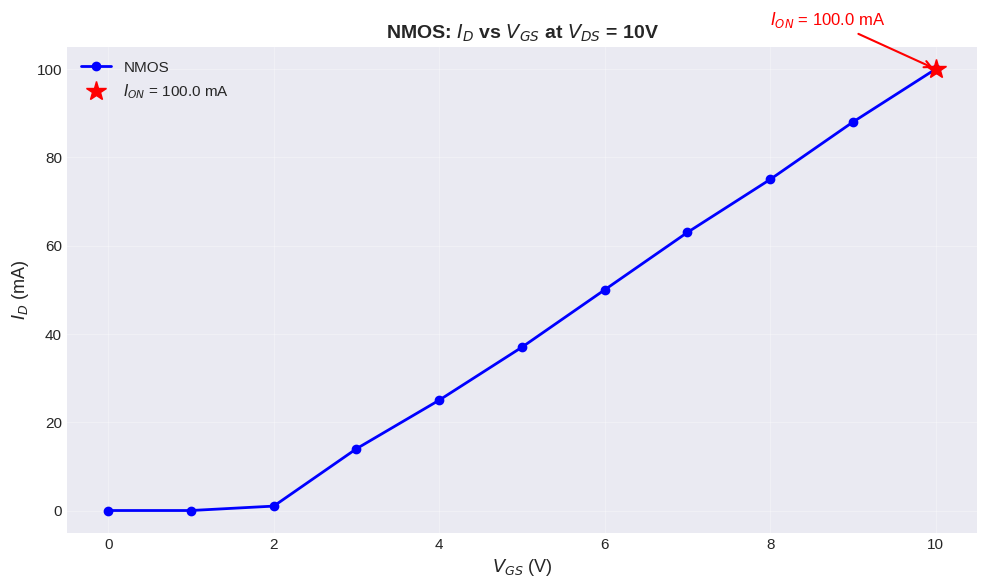

NMOS ION = 100.000 mA at VGS = 10 V


In [5]:
# Extract ID at VDS=10V for NMOS
ID_at_VDS10_nmos = ID_nmos_part2[:, 3]  # Last column (VDS=10V)
ION_nmos = np.max(ID_at_VDS10_nmos)  # Maximum current = ION
ION_VGS_nmos = VGS_values_nmos[np.argmax(ID_at_VDS10_nmos)]

plt.figure(figsize=(10, 6))
plt.plot(VGS_values_nmos, ID_at_VDS10_nmos * 1000, 'b-o', linewidth=2, markersize=6, label='NMOS')
plt.plot(ION_VGS_nmos, ION_nmos * 1000, 'r*', markersize=15, label=f'$I_{{ON}}$ = {ION_nmos*1000:.1f} mA')

# Add annotation
plt.annotate(f'$I_{{ON}}$ = {ION_nmos*1000:.1f} mA',
             xy=(ION_VGS_nmos, ION_nmos*1000),
             xytext=(ION_VGS_nmos-2, ION_nmos*1000+10),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=12, color='red')

plt.xlabel('$V_{GS}$ (V)', fontsize=13)
plt.ylabel('$I_D$ (mA)', fontsize=13)
plt.title('NMOS: $I_D$ vs $V_{GS}$ at $V_{DS}$ = 10V', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"NMOS ION = {ION_nmos*1000:.3f} mA at VGS = {ION_VGS_nmos} V")

## 4. Plot ID vs VGS at VDS = 10V with ION labeled (PMOS)

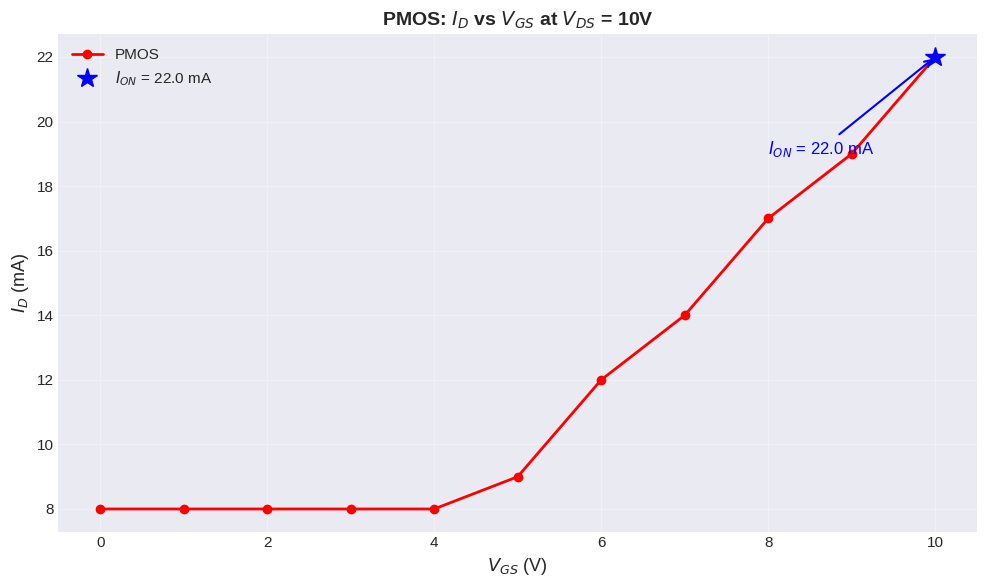

PMOS ION = 22.000 mA at VGS = 10 V


In [6]:
# Extract ID at VDS=10V for PMOS
ID_at_VDS10_pmos = ID_pmos_part2[:, 3]  # Last column (VDS=10V)
ION_pmos = np.max(ID_at_VDS10_pmos)  # Maximum current = ION
ION_VGS_pmos = VGS_values_pmos[np.argmax(ID_at_VDS10_pmos)]

plt.figure(figsize=(10, 6))
plt.plot(VGS_values_pmos, ID_at_VDS10_pmos * 1000, 'r-o', linewidth=2, markersize=6, label='PMOS')
plt.plot(ION_VGS_pmos, ION_pmos * 1000, 'b*', markersize=15, label=f'$I_{{ON}}$ = {ION_pmos*1000:.1f} mA')

# Add annotation
plt.annotate(f'$I_{{ON}}$ = {ION_pmos*1000:.1f} mA',
             xy=(ION_VGS_pmos, ION_pmos*1000),
             xytext=(ION_VGS_pmos-2, ION_pmos*1000-3),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=12, color='blue')

plt.xlabel('$V_{GS}$ (V)', fontsize=13)
plt.ylabel('$I_D$ (mA)', fontsize=13)
plt.title('PMOS: $I_D$ vs $V_{GS}$ at $V_{DS}$ = 10V', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"PMOS ION = {ION_pmos*1000:.3f} mA at VGS = {ION_VGS_pmos} V")

## 5. Plot gm vs VGS at VDS = 10V with gm(peak) labeled (NMOS)

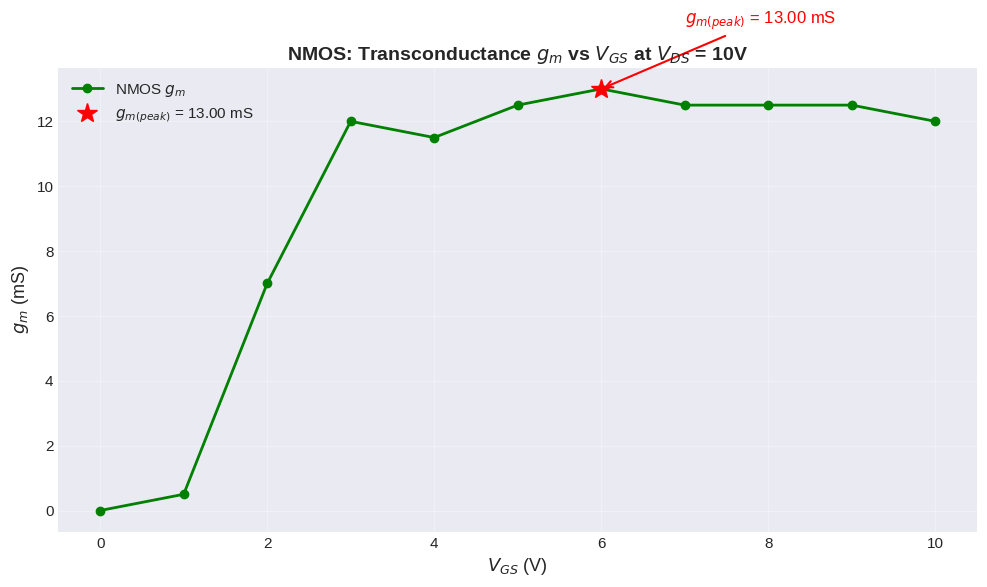

NMOS gm(peak) = 13.000 mS at VGS = 6 V


In [7]:
# Calculate transconductance gm = ΔID/ΔVGS for NMOS
gm_nmos = np.gradient(ID_at_VDS10_nmos, VGS_values_nmos)
gm_peak_nmos = np.max(gm_nmos)
gm_peak_VGS_nmos = VGS_values_nmos[np.argmax(gm_nmos)]

plt.figure(figsize=(10, 6))
plt.plot(VGS_values_nmos, gm_nmos * 1000, 'g-o', linewidth=2, markersize=6, label='NMOS $g_m$')
plt.plot(gm_peak_VGS_nmos, gm_peak_nmos * 1000, 'r*', markersize=15,
         label=f'$g_{{m(peak)}}$ = {gm_peak_nmos*1000:.2f} mS')

# Add annotation
plt.annotate(f'$g_{{m(peak)}}$ = {gm_peak_nmos*1000:.2f} mS',
             xy=(gm_peak_VGS_nmos, gm_peak_nmos*1000),
             xytext=(gm_peak_VGS_nmos+1, gm_peak_nmos*1000+2),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=12, color='red')

plt.xlabel('$V_{GS}$ (V)', fontsize=13)
plt.ylabel('$g_m$ (mS)', fontsize=13)
plt.title('NMOS: Transconductance $g_m$ vs $V_{GS}$ at $V_{DS}$ = 10V', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"NMOS gm(peak) = {gm_peak_nmos*1000:.3f} mS at VGS = {gm_peak_VGS_nmos} V")

## 6. Plot gm vs VGS at VDS = 10V with gm(peak) labeled (PMOS)

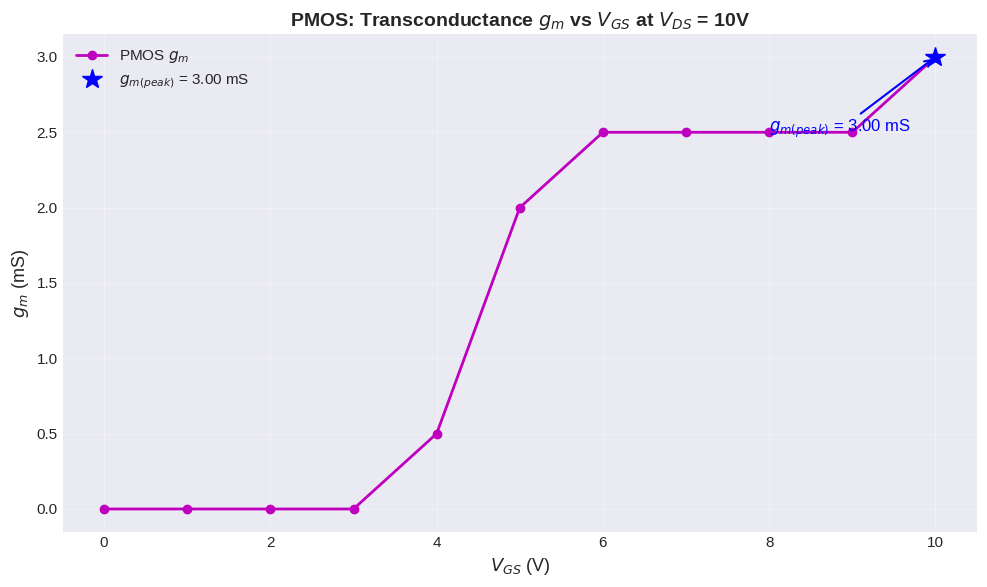

PMOS gm(peak) = 3.000 mS at VGS = 10 V


In [8]:
# Calculate transconductance gm = ΔID/ΔVGS for PMOS
gm_pmos = np.gradient(ID_at_VDS10_pmos, VGS_values_pmos)
gm_peak_pmos = np.max(gm_pmos)
gm_peak_VGS_pmos = VGS_values_pmos[np.argmax(gm_pmos)]

plt.figure(figsize=(10, 6))
plt.plot(VGS_values_pmos, gm_pmos * 1000, 'm-o', linewidth=2, markersize=6, label='PMOS $g_m$')
plt.plot(gm_peak_VGS_pmos, gm_peak_pmos * 1000, 'b*', markersize=15,
         label=f'$g_{{m(peak)}}$ = {gm_peak_pmos*1000:.2f} mS')

# Add annotation
plt.annotate(f'$g_{{m(peak)}}$ = {gm_peak_pmos*1000:.2f} mS',
             xy=(gm_peak_VGS_pmos, gm_peak_pmos*1000),
             xytext=(gm_peak_VGS_pmos-2, gm_peak_pmos*1000-0.5),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=12, color='blue')

plt.xlabel('$V_{GS}$ (V)', fontsize=13)
plt.ylabel('$g_m$ (mS)', fontsize=13)
plt.title('PMOS: Transconductance $g_m$ vs $V_{GS}$ at $V_{DS}$ = 10V', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"PMOS gm(peak) = {gm_peak_pmos*1000:.3f} mS at VGS = {gm_peak_VGS_pmos} V")

## 7. Compute Threshold Voltage VT0 (NMOS)

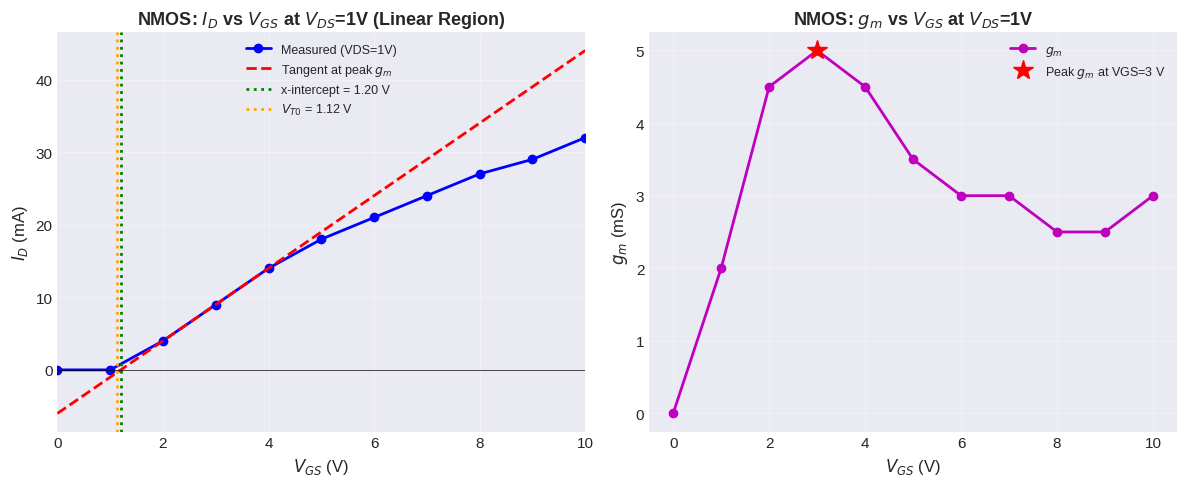

NMOS Threshold Voltage Extraction (Linear Region Method):
  Using VDS = 1V (VDS=0.04V has insufficient current)
  Peak gm location: VGS = 3 V
  Peak gm value: 5.0000 mS
  Tangent line: ID = 5.0000 × VGS + -6.0000 (mA)
  x-axis intercept: 1.200 V
  Thermal correction (3kT/q): 0.0776 V
  VT0 = 1.200 - 0.0776 = 1.122 V


In [9]:
# Method: Linear region extrapolation using VDS in linear region
# NMOS: Use VDS=1V (VDS=0.04V has insufficient current)
# PMOS: Use VDS=0.04V (has measurable current)

# Extract ID at VDS=1V for NMOS (column index 1)
ID_at_VDS_linear_nmos = ID_nmos_part2[:, 1]  # VDS=1V

# Calculate gm = ΔID/ΔVGS
gm_linear_nmos = np.gradient(ID_at_VDS_linear_nmos, VGS_values_nmos)

# Find peak gm
gm_peak_idx_nmos = np.argmax(gm_linear_nmos)
gm_peak_vgs_nmos = VGS_values_nmos[gm_peak_idx_nmos]

# Draw tangent line at peak gm point
# The tangent line has slope = peak gm value
slope = gm_linear_nmos[gm_peak_idx_nmos]
intercept = ID_at_VDS_linear_nmos[gm_peak_idx_nmos] - slope * gm_peak_vgs_nmos

# Find x-axis intercept (where ID = 0)
x_intercept = -intercept / slope

# Apply thermal voltage correction: VT0 = x-intercept - 3kT/q
k = 1.380649e-23  # Boltzmann constant (J/K)
T = 300  # Temperature (K), room temperature
q = 1.602176634e-19  # Elementary charge (C)
thermal_correction = 3 * k * T / q  # 3kT/q ≈ 0.078V at 300K

VT0_nmos_linear = x_intercept - thermal_correction

# Create tangent line for plotting
VGS_tangent = np.linspace(0, 10, 100)
ID_tangent = slope * VGS_tangent + intercept

# Plot ID vs VGS at VDS=1V with tangent line
plt.figure(figsize=(12, 5))

# Subplot 1: ID vs VGS
plt.subplot(1, 2, 1)
plt.plot(VGS_values_nmos, ID_at_VDS_linear_nmos * 1000, 'bo-', linewidth=2, markersize=6, label='Measured (VDS=1V)')
plt.plot(VGS_tangent, ID_tangent * 1000, 'r--', linewidth=2, label=f'Tangent at peak $g_m$')
plt.axvline(x_intercept, color='g', linestyle=':', linewidth=2, label=f'x-intercept = {x_intercept:.2f} V')
plt.axvline(VT0_nmos_linear, color='orange', linestyle=':', linewidth=2, label=f'$V_{{T0}}$ = {VT0_nmos_linear:.2f} V')
plt.axhline(0, color='k', linestyle='-', linewidth=0.5)
plt.xlabel('$V_{GS}$ (V)', fontsize=12)
plt.ylabel('$I_D$ (mA)', fontsize=12)
plt.title('NMOS: $I_D$ vs $V_{GS}$ at $V_{DS}$=1V (Linear Region)', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9)
plt.xlim(0, 10)

# Subplot 2: gm vs VGS
plt.subplot(1, 2, 2)
plt.plot(VGS_values_nmos, gm_linear_nmos * 1000, 'mo-', linewidth=2, markersize=6, label='$g_m$')
plt.plot(gm_peak_vgs_nmos, gm_linear_nmos[gm_peak_idx_nmos] * 1000, 'r*', markersize=15,
         label=f'Peak $g_m$ at VGS={gm_peak_vgs_nmos} V')
plt.xlabel('$V_{GS}$ (V)', fontsize=12)
plt.ylabel('$g_m$ (mS)', fontsize=12)
plt.title('NMOS: $g_m$ vs $V_{GS}$ at $V_{DS}$=1V', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9)

plt.tight_layout()
plt.show()

print(f"NMOS Threshold Voltage Extraction (Linear Region Method):")
print(f"  Using VDS = 1V (VDS=0.04V has insufficient current)")
print(f"  Peak gm location: VGS = {gm_peak_vgs_nmos} V")
print(f"  Peak gm value: {gm_linear_nmos[gm_peak_idx_nmos]*1000:.4f} mS")
print(f"  Tangent line: ID = {slope*1000:.4f} × VGS + {intercept*1000:.4f} (mA)")
print(f"  x-axis intercept: {x_intercept:.3f} V")
print(f"  Thermal correction (3kT/q): {thermal_correction:.4f} V")
print(f"  VT0 = {x_intercept:.3f} - {thermal_correction:.4f} = {VT0_nmos_linear:.3f} V")

## 8. Compute Threshold Voltage VT0 (PMOS)

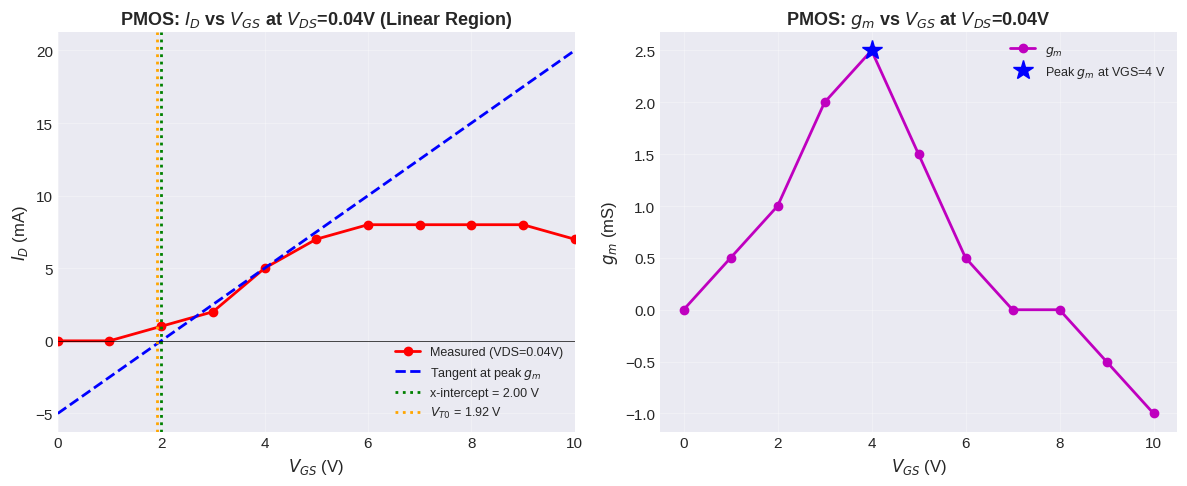

PMOS Threshold Voltage Extraction (Linear Region Method):
  Peak gm location: VGS = 4 V
  Peak gm value: 2.5000 mS
  Tangent line: ID = 2.5000 × VGS + -5.0000 (mA)
  x-axis intercept: 2.000 V
  Thermal correction (3kT/q): 0.0776 V
  VT0 = 2.000 - 0.0776 = 1.922 V


In [10]:
# Method: Linear region extrapolation at VDS close to zero (VDS=0.04V)

# Extract ID at VDS=0.04V (linear region)
ID_at_VDS004_pmos = ID_pmos_part2[:, 0]  # First column (VDS=0.04V)

# Calculate gm = ΔID/ΔVGS
gm_linear_pmos = np.gradient(ID_at_VDS004_pmos, VGS_values_pmos)

# Find peak gm
gm_peak_idx_pmos = np.argmax(gm_linear_pmos)
gm_peak_vgs_pmos = VGS_values_pmos[gm_peak_idx_pmos]

# Draw tangent line at peak gm point
slope_pmos = gm_linear_pmos[gm_peak_idx_pmos]
intercept_pmos = ID_at_VDS004_pmos[gm_peak_idx_pmos] - slope_pmos * gm_peak_vgs_pmos

# Find x-axis intercept
x_intercept_pmos = -intercept_pmos / slope_pmos

# Apply thermal voltage correction
thermal_correction = 3 * k * T / q
VT0_pmos_linear = x_intercept_pmos - thermal_correction

# Create tangent line for plotting
VGS_tangent_pmos = np.linspace(0, 10, 100)
ID_tangent_pmos = slope_pmos * VGS_tangent_pmos + intercept_pmos

# Plot
plt.figure(figsize=(12, 5))

# Subplot 1: ID vs VGS
plt.subplot(1, 2, 1)
plt.plot(VGS_values_pmos, ID_at_VDS004_pmos * 1000, 'ro-', linewidth=2, markersize=6, label='Measured (VDS=0.04V)')
plt.plot(VGS_tangent_pmos, ID_tangent_pmos * 1000, 'b--', linewidth=2, label=f'Tangent at peak $g_m$')
plt.axvline(x_intercept_pmos, color='g', linestyle=':', linewidth=2, label=f'x-intercept = {x_intercept_pmos:.2f} V')
plt.axvline(VT0_pmos_linear, color='orange', linestyle=':', linewidth=2, label=f'$V_{{T0}}$ = {VT0_pmos_linear:.2f} V')
plt.axhline(0, color='k', linestyle='-', linewidth=0.5)
plt.xlabel('$V_{GS}$ (V)', fontsize=12)
plt.ylabel('$I_D$ (mA)', fontsize=12)
plt.title('PMOS: $I_D$ vs $V_{GS}$ at $V_{DS}$=0.04V (Linear Region)', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9)
plt.xlim(0, 10)

# Subplot 2: gm vs VGS
plt.subplot(1, 2, 2)
plt.plot(VGS_values_pmos, gm_linear_pmos * 1000, 'mo-', linewidth=2, markersize=6, label='$g_m$')
plt.plot(gm_peak_vgs_pmos, gm_linear_pmos[gm_peak_idx_pmos] * 1000, 'b*', markersize=15,
         label=f'Peak $g_m$ at VGS={gm_peak_vgs_pmos} V')
plt.xlabel('$V_{GS}$ (V)', fontsize=12)
plt.ylabel('$g_m$ (mS)', fontsize=12)
plt.title('PMOS: $g_m$ vs $V_{GS}$ at $V_{DS}$=0.04V', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9)

plt.tight_layout()
plt.show()

print(f"PMOS Threshold Voltage Extraction (Linear Region Method):")
print(f"  Peak gm location: VGS = {gm_peak_vgs_pmos} V")
print(f"  Peak gm value: {gm_linear_pmos[gm_peak_idx_pmos]*1000:.4f} mS")
print(f"  Tangent line: ID = {slope_pmos*1000:.4f} × VGS + {intercept_pmos*1000:.4f} (mA)")
print(f"  x-axis intercept: {x_intercept_pmos:.3f} V")
print(f"  Thermal correction (3kT/q): {thermal_correction:.4f} V")
print(f"  VT0 = {x_intercept_pmos:.3f} - {thermal_correction:.4f} = {VT0_pmos_linear:.3f} V")

## 9. Plot ID vs VDS and Identify Breakdown Region (NMOS)

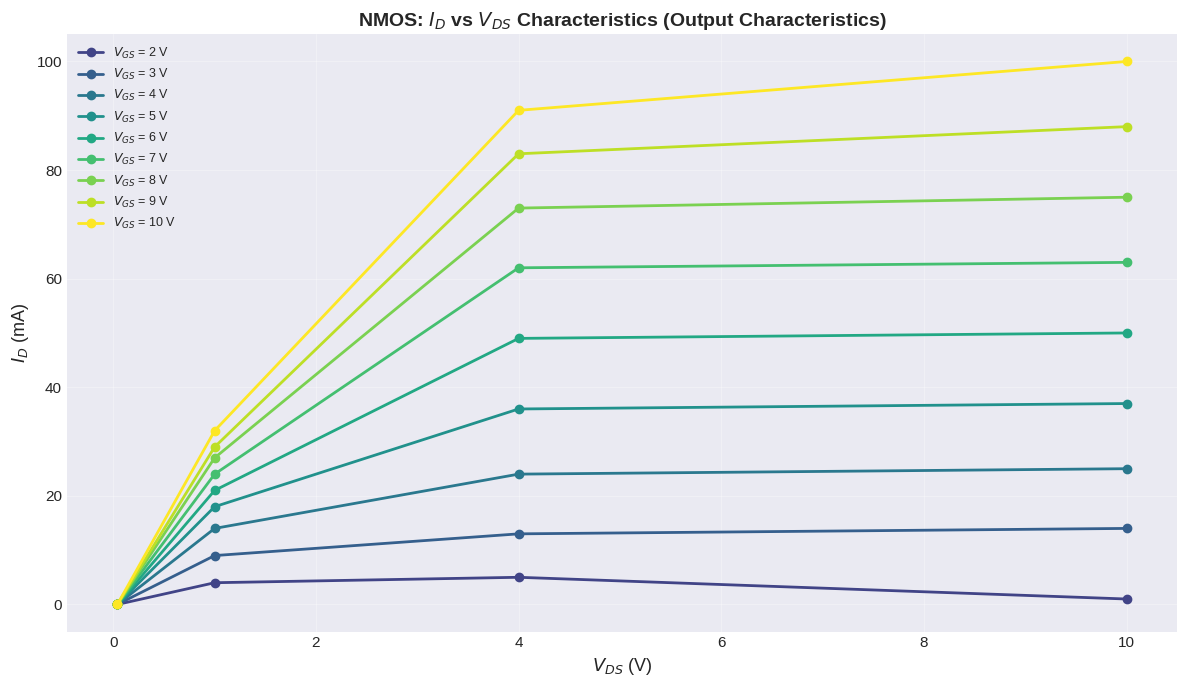

In [11]:
# Plot ID vs VDS for different VGS values (NMOS)
plt.figure(figsize=(12, 7))

# Plot each VGS curve
colors = plt.cm.viridis(np.linspace(0, 1, len(VGS_values_nmos)))
for i, vgs in enumerate(VGS_values_nmos):
    if np.max(ID_nmos_part2[i, :]) > 0.001:  # Only plot if current is significant
        plt.plot(VDS_values_nmos, ID_nmos_part2[i, :] * 1000, 'o-',
                linewidth=2, markersize=6, color=colors[i], label=f'$V_{{GS}}$ = {vgs} V')

# Add note about breakdown region

plt.xlabel('$V_{DS}$ (V)', fontsize=13)
plt.ylabel('$I_D$ (mA)', fontsize=13)
plt.title('NMOS: $I_D$ vs $V_{DS}$ Characteristics (Output Characteristics)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9, loc='upper left')
plt.tight_layout()
plt.show()

## 10. Plot ID vs VDS and Identify Breakdown Region (PMOS)

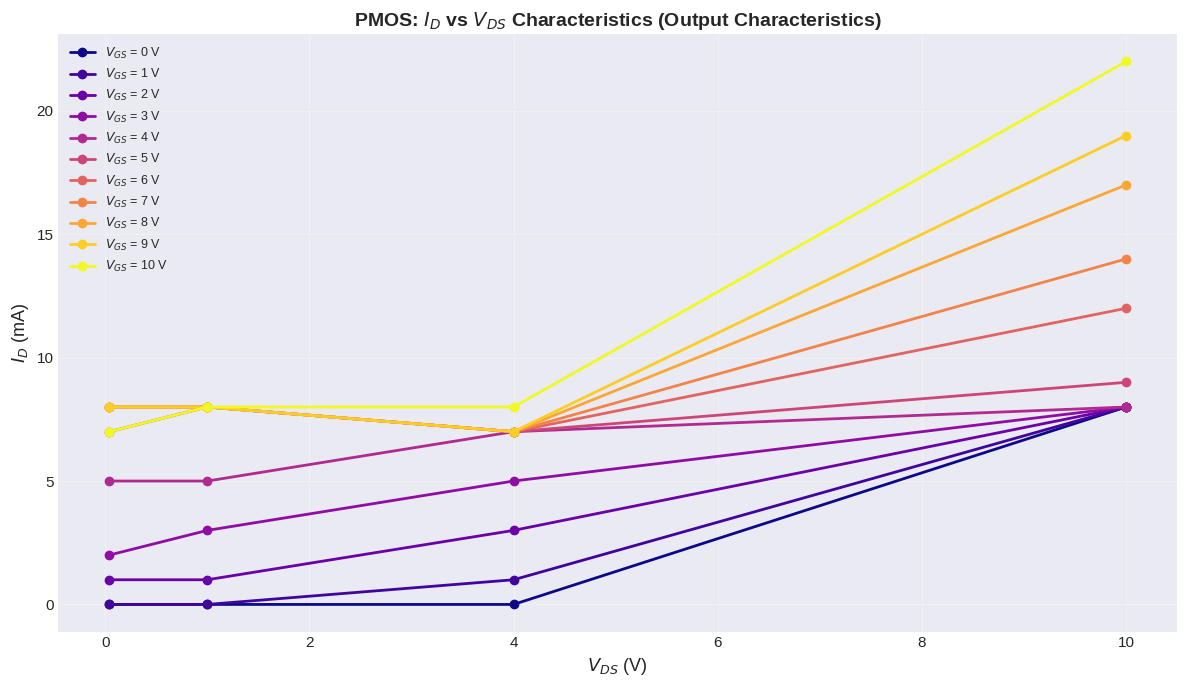

In [12]:
# Plot ID vs VDS for different VGS values (PMOS)
plt.figure(figsize=(12, 7))

# Plot each VGS curve
colors = plt.cm.plasma(np.linspace(0, 1, len(VGS_values_pmos)))
for i, vgs in enumerate(VGS_values_pmos):
    if np.max(ID_pmos_part2[i, :]) > 0.001:  # Only plot if current is significant
        plt.plot(VDS_values_pmos, ID_pmos_part2[i, :] * 1000, 'o-',
                linewidth=2, markersize=6, color=colors[i], label=f'$V_{{GS}}$ = {vgs} V')


plt.xlabel('$V_{DS}$ (V)', fontsize=13)
plt.ylabel('$I_D$ (mA)', fontsize=13)
plt.title('PMOS: $I_D$ vs $V_{DS}$ Characteristics (Output Characteristics)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9, loc='upper left')
plt.tight_layout()
plt.show()

## 11. Plot gd vs VDS and Extract λ (NMOS)

VGS=4.0V: VA = -2.30 V, λ = -0.4355 V⁻¹
VGS=10.0V: VA = -4.21 V, λ = -0.2374 V⁻¹


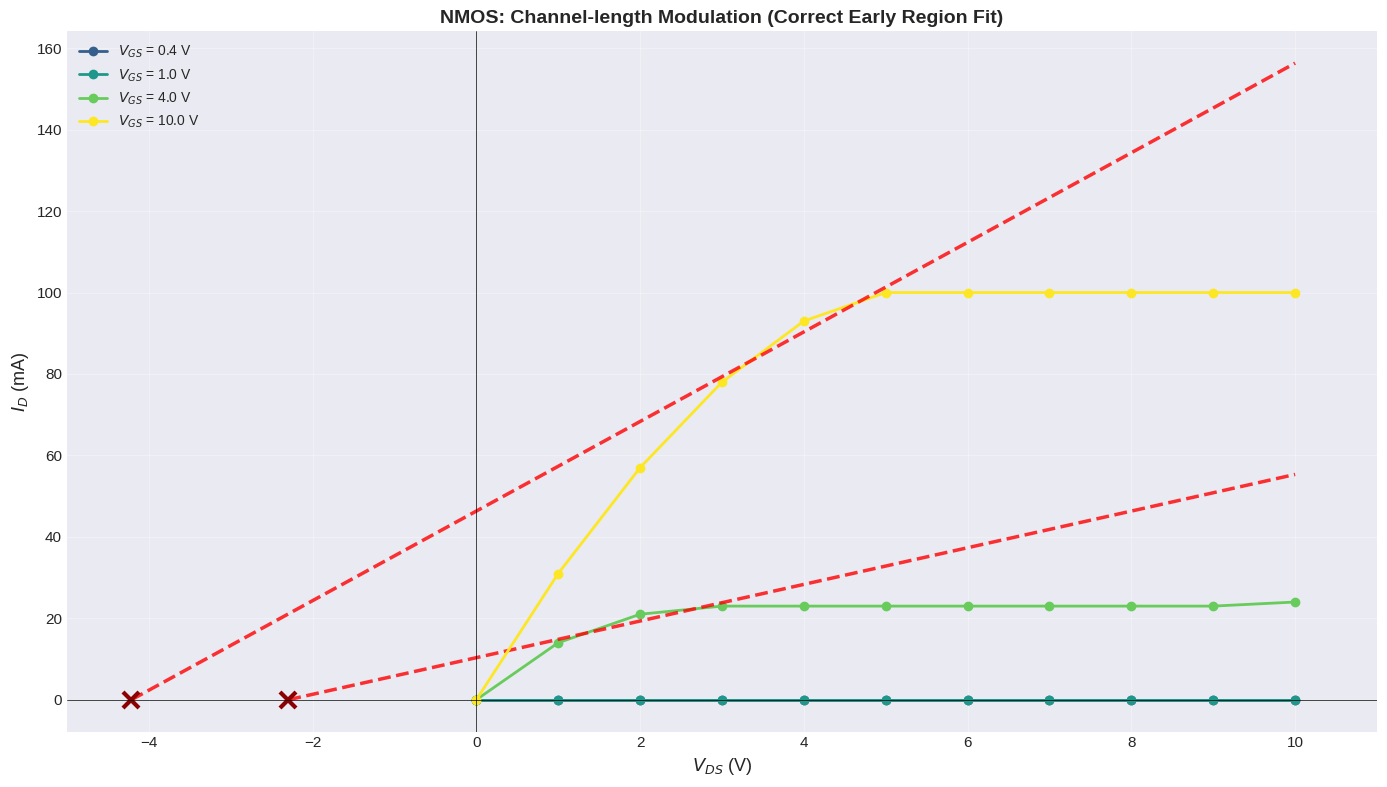


NMOS Average Early Voltage VA = -3.25 V
NMOS Average λ = -0.3364 V⁻¹


In [13]:
plt.figure(figsize=(14, 8))

lambda_values_nmos = []
VA_values_nmos = []

# Only use these VGS values (exclude 0.4 and 1)
VGS_values_to_use = [4, 10]

# Colors for plot
colors = plt.cm.viridis(np.linspace(0.3, 1, len(VGS_values_nmos_part3)))

for i, vgs in enumerate(VGS_values_nmos_part3):
    ID_curve = ID_nmos_part3[:, i]  # Current in Amperes

    # Plot measured ID-VDS
    plt.plot(VDS_values_nmos_part3, ID_curve * 1000, 'o-', linewidth=2,
             markersize=6, color=colors[i], label=f'$V_{{GS}}$ = {vgs} V')

    # Only extract λ for VGS = 4 and 10
    if vgs in VGS_values_to_use:

        # ---------------------------
        # EARLY REGION SELECTION
        # ---------------------------
        if vgs == 4:
            # Use 1–3 V (small but real slope exists only here)
            sat_indices = (VDS_values_nmos_part3 >= 1.0) & (VDS_values_nmos_part3 <= 3.0)

        elif vgs == 10:
            # At high VGS device saturates early → almost flat slope
            # Use 3–5 V region (still extremely small slope)
            sat_indices = (VDS_values_nmos_part3 >= 3.0) & (VDS_values_nmos_part3 <= 5.0)

        VDS_sat = VDS_values_nmos_part3[sat_indices]
        ID_sat = ID_curve[sat_indices]

        # Only fit if enough points exist
        if len(VDS_sat) >= 2:
            # Fit straight line: ID = slope * VDS + intercept
            slope, intercept = np.polyfit(VDS_sat, ID_sat, 1)

            # Early voltage VA = -intercept / slope
            VA = -intercept / slope if slope != 0 else np.inf

            # Channel-length modulation λ = 1/VA
            lambda_val = 1 / VA if VA != 0 else 0

            # Save results
            VA_values_nmos.append(VA)
            lambda_values_nmos.append(lambda_val)

            # Plot tangent line (extend to left)
            VDS_extended = np.linspace(VA, 10, 200)
            ID_line = slope * VDS_extended + intercept
            plt.plot(VDS_extended, ID_line * 1000, '--', linewidth=2.5,
                     color='red', alpha=0.8)

            # Mark Early voltage intercept
            plt.plot(VA, 0, 'x', markersize=12, markeredgewidth=3, color='darkred')

            print(f"VGS={vgs}V: VA = {VA:.2f} V, λ = {lambda_val:.4f} V⁻¹")


# Plot formatting
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.xlabel('$V_{DS}$ (V)', fontsize=13)
plt.ylabel('$I_D$ (mA)', fontsize=13)
plt.title('NMOS: Channel-length Modulation (Correct Early Region Fit)',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, loc='upper left')
plt.xlim(-5, 11)
plt.tight_layout()
plt.show()

# Average values
if lambda_values_nmos:
    lambda_avg_nmos = np.mean(lambda_values_nmos)
    VA_avg_nmos = np.mean(VA_values_nmos)
    print(f"\nNMOS Average Early Voltage VA = {VA_avg_nmos:.2f} V")
    print(f"NMOS Average λ = {lambda_avg_nmos:.4f} V⁻¹")




## 12. Plot gd vs VDS and Extract λ (PMOS)

VGS=4.0V: VA = 108786702469054704.00 V, λ = 0.0000 V⁻¹
VGS=10.0V: VA = 1.54 V, λ = 0.6494 V⁻¹


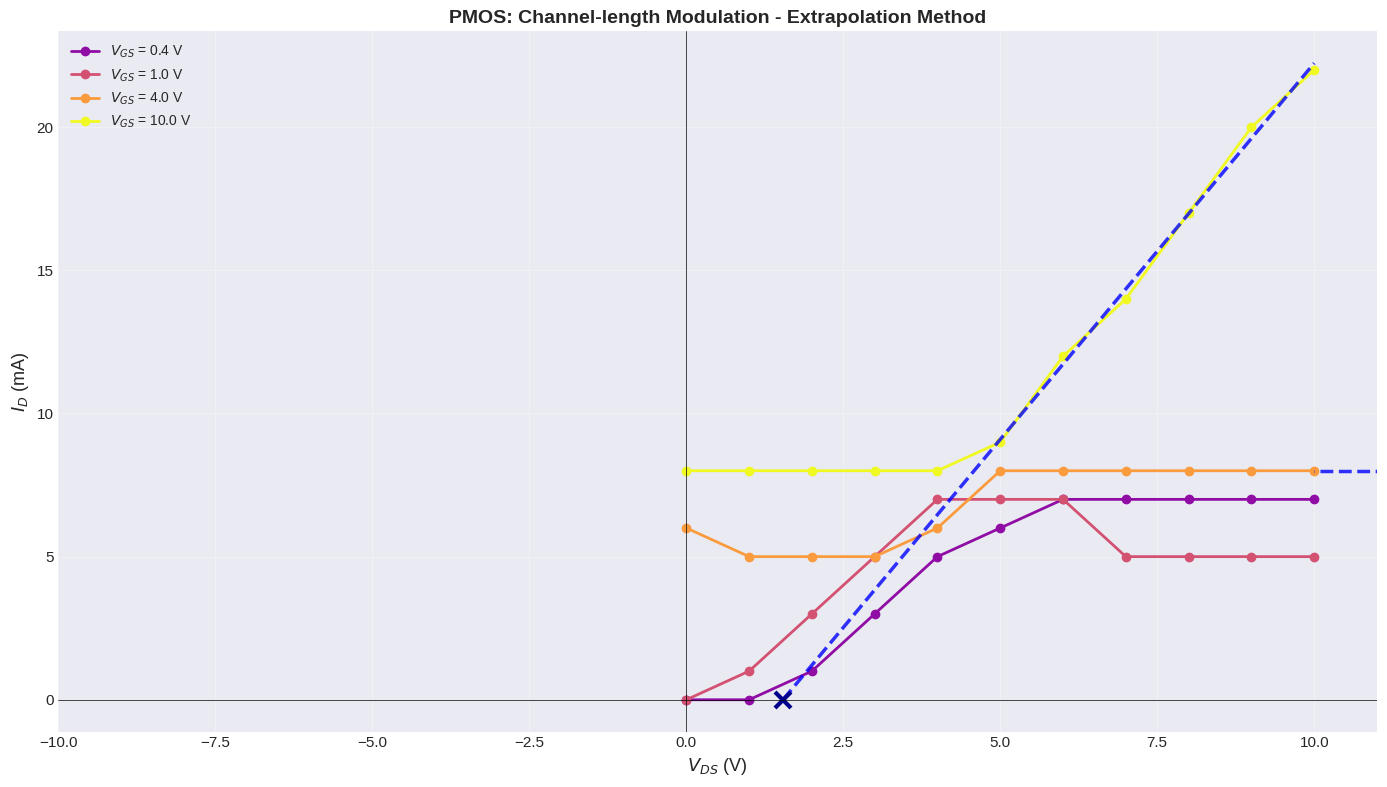


PMOS Average Early Voltage VA = 54393351234527352.00 V
PMOS Average λ = 1/VA = 0.3247 V⁻¹


In [14]:
# Method: Draw tangent line in saturation region, find x-axis intercept (VA)
# Then calculate λ = 1/VA

plt.figure(figsize=(14, 8))

lambda_values_pmos = []
VA_values_pmos = []

# Plot ID vs VDS characteristics
colors = plt.cm.plasma(np.linspace(0.3, 1, len(VGS_values_pmos_part3)))

for i, vgs in enumerate(VGS_values_pmos_part3):
    ID_curve = ID_pmos_part3[:, i]  # Current in Amperes

    # Plot the measured curve
    plt.plot(VDS_values_pmos_part3, ID_curve * 1000, 'o-', linewidth=2, markersize=6,
             color=colors[i], label=f'$V_{{GS}}$ = {vgs} V')

    # Extract λ for VGS >= 4V (strong inversion)
    if vgs >= 4:
        # Define saturation region (VDS >= 5V)
        sat_indices = VDS_values_pmos_part3 >= 5
        VDS_sat = VDS_values_pmos_part3[sat_indices]
        ID_sat = ID_curve[sat_indices]

        if len(VDS_sat) >= 2:
            # Fit a line to the saturation region: ID = slope * VDS + intercept
            slope, intercept = np.polyfit(VDS_sat, ID_sat, 1)

            # Extrapolate the line to find x-axis intercept (VA)
            VA = -intercept / slope

            # Calculate λ = 1/VA
            lambda_val = 1 / VA if VA != 0 else 0

            # Store values
            VA_values_pmos.append(VA)
            lambda_values_pmos.append(lambda_val)

            # Draw the extrapolated line
            VDS_extended = np.linspace(max(VA, -10), 10, 100)
            ID_line = slope * VDS_extended + intercept
            plt.plot(VDS_extended, ID_line * 1000, '--', linewidth=2.5,
                    color='blue', alpha=0.8)

            # Mark the VA intercept
            plt.plot(VA, 0, 'x', markersize=12, markeredgewidth=3, color='darkblue')

            print(f"VGS={vgs}V: VA = {VA:.2f} V, λ = {lambda_val:.4f} V⁻¹")

plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.xlabel('$V_{DS}$ (V)', fontsize=13)
plt.ylabel('$I_D$ (mA)', fontsize=13)
plt.title('PMOS: Channel-length Modulation - Extrapolation Method', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, loc='upper left')
plt.xlim(-10, 11)
plt.tight_layout()
plt.show()

if lambda_values_pmos:
    lambda_avg_pmos = np.mean(lambda_values_pmos)
    VA_avg_pmos = np.mean(VA_values_pmos)
    print(f"\nPMOS Average Early Voltage VA = {VA_avg_pmos:.2f} V")
    print(f"PMOS Average λ = 1/VA = {lambda_avg_pmos:.4f} V⁻¹")

VSG=10.0V: slope=0.0003000000000000003, VA=-24.00 V, λ=-0.0417


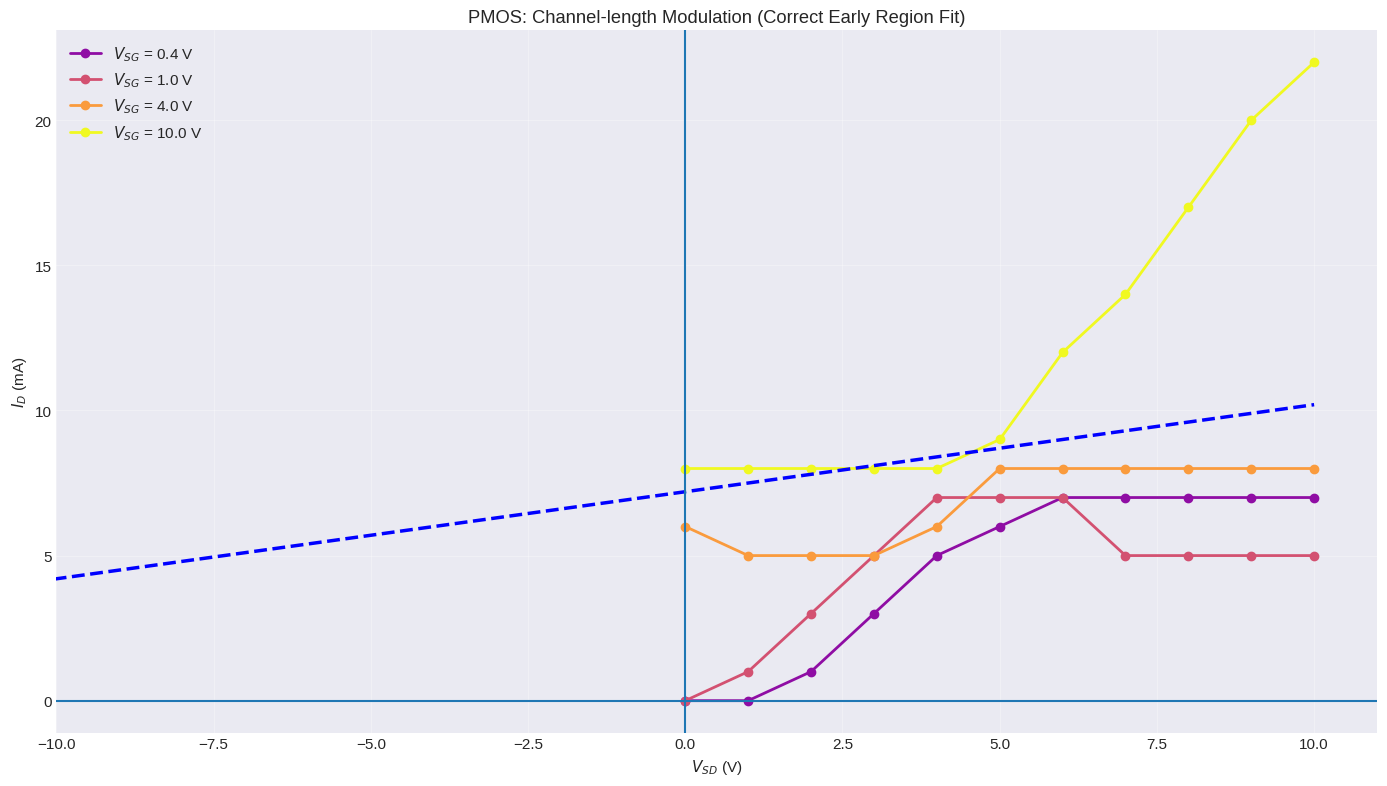


Final PMOS Early Voltage (from VSG=10 only): -23.999999999999968
Final PMOS λ: -0.04166666666666672


In [15]:
plt.figure(figsize=(14, 8))

lambda_values_pmos = []
VA_values_pmos = []

colors = plt.cm.plasma(np.linspace(0.3, 1, len(VGS_values_pmos_part3)))

for i, vsg in enumerate(VGS_values_pmos_part3):
    ID_curve = ID_pmos_part3[:, i]  # current in Amps

    # Plot measured
    plt.plot(VDS_values_pmos_part3, ID_curve * 1000, 'o-', linewidth=2,
             markersize=6, color=colors[i], label=f'$V_{{SG}}$ = {vsg} V')

    # Only extract lambda for strong inversion (VSG = 10V)
    if vsg == 10:

        # PMOS Early effect appears in VSD = 2–5 V (check data)
        early_region = (VDS_values_pmos_part3 >= 2) & (VDS_values_pmos_part3 <= 5)

        VDS_fit = VDS_values_pmos_part3[early_region]
        ID_fit = ID_curve[early_region]

        slope, intercept = np.polyfit(VDS_fit, ID_fit, 1)

        VA = -intercept / slope
        lambda_val = 1 / VA

        VA_values_pmos.append(VA)
        lambda_values_pmos.append(lambda_val)

        # Plot tangent line
        VDS_ext = np.linspace(VA, 10, 200)
        ID_line = slope * VDS_ext + intercept

        plt.plot(VDS_ext, ID_line * 1000, '--', color='blue', linewidth=2.5)
        plt.plot(VA, 0, 'x', markersize=12, markeredgewidth=3, color='navy')

        print(f"VSG={vsg}V: slope={slope}, VA={VA:.2f} V, λ={lambda_val:.4f}")

plt.axhline(0)
plt.axvline(0)
plt.xlabel("$V_{SD}$ (V)")
plt.ylabel("$I_D$ (mA)")
plt.title("PMOS: Channel-length Modulation (Correct Early Region Fit)")
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(-10, 11)
plt.tight_layout()
plt.show()

if lambda_values_pmos:
    print("\nFinal PMOS Early Voltage (from VSG=10 only):", np.mean(VA_values_pmos))
    print("Final PMOS λ:", np.mean(lambda_values_pmos))


# PART II - Data Analysis (Take Home)

---

## Section 1: Planar MOSFET Analysis (Nanoscale Devices)

In [16]:
import os
import pandas as pd
from scipy.optimize import curve_fit

data_dir = r'/content/drive/MyDrive/ECE355/ECE335_MOSFET_data'
planar_dir = os.path.join(data_dir, 'Planar MOSFET')
fdsoi_dir = os.path.join(data_dir, 'FDSOI and finFET MOSFET')
bjt_dir = r'/content/drive/MyDrive/ECE355/ECE335_BJT_data'

channel_lengths = [65, 90, 130, 180, 250, 350]

def read_planar_transfer(L):
    # File naming: 065, 090 for L<100; 13, 18, 25, 35 for L>=100
    if L < 100:
        filename = f'planar_lp{L:03d}_w1_n80_transfer.txt'
    else:
        filename = f'planar_lp{L//10}_w1_n80_transfer.txt'
    filepath = os.path.join(planar_dir, filename)

    with open(filepath, 'r') as f:
        lines = f.readlines()

    data_sections = []
    current_vd = None
    current_data = []

    for line in lines:
        if 'ICCAP_VAR Vd' in line:
            if current_data and current_vd is not None:
                data_sections.append((current_vd, np.array(current_data)))
                current_data = []
            current_vd = float(line.split()[2])
        elif line.strip() and not line.startswith('#') and not line.startswith('!') and 'BEGIN' not in line and 'END' not in line and 'ICCAP' not in line:
            parts = line.split()
            if len(parts) >= 2:
                try:
                    vg = float(parts[0])
                    id_val = float(parts[1])
                    current_data.append([vg, id_val])
                except:
                    pass

    if current_data and current_vd is not None:
        data_sections.append((current_vd, np.array(current_data)))

    return data_sections

def read_planar_output(L):
    # File naming: 065, 090 for L<100; 13, 18, 25, 35 for L>=100
    if L < 100:
        filename = f'planar_lp{L:03d}_w1_n80_output.txt'
    else:
        filename = f'planar_lp{L//10}_w1_n80_output.txt'
    filepath = os.path.join(planar_dir, filename)

    with open(filepath, 'r') as f:
        lines = f.readlines()

    data_sections = []
    current_vg = None
    current_data = []

    for line in lines:
        if 'ICCAP_VAR Vg' in line:
            if current_data and current_vg is not None:
                data_sections.append((current_vg, np.array(current_data)))
                current_data = []
            current_vg = float(line.split()[2])
        elif line.strip() and not line.startswith('#') and not line.startswith('!') and 'BEGIN' not in line and 'END' not in line and 'ICCAP' not in line:
            parts = line.split()
            if len(parts) >= 2:
                try:
                    vd = float(parts[0])
                    id_val = float(parts[1])
                    current_data.append([vd, id_val])
                except:
                    pass

    if current_data and current_vg is not None:
        data_sections.append((current_vg, np.array(current_data)))

    return data_sections

print("Data loading functions defined")

Data loading functions defined


In [17]:
# Check if files exist
import os

print("Checking Planar MOSFET directory:")
planar_path = '/content/drive/MyDrive/ECE355/ECE335_MOSFET_data/Planar MOSFET'
if os.path.exists(planar_path):
    files = os.listdir(planar_path)
    print(f"Found {len(files)} files:")
    for f in sorted(files):
        print(f"  {f}")
else:
    print(f"Directory does not exist: {planar_path}")

print("\nChecking FDSOI directory:")
fdsoi_path = '/content/drive/MyDrive/ECE355/ECE335_MOSFET_data/FDSOI and finFET MOSFET'
if os.path.exists(fdsoi_path):
    files = os.listdir(fdsoi_path)
    print(f"Found {len(files)} files:")
    for f in sorted(files):
        print(f"  {f}")
else:
    print(f"Directory does not exist: {fdsoi_path}")

print("\nChecking BJT directory:")
bjt_path = '/content/drive/MyDrive/ECE355/ECE335_BJT_data'
if os.path.exists(bjt_path):
    files = os.listdir(bjt_path)
    print(f"Found {len(files)} files:")
    for f in sorted(files):
        print(f"  {f}")
else:
    print(f"Directory does not exist: {bjt_path}")

Checking Planar MOSFET directory:
Found 13 files:
  planar_lp065_w1_n80_output.txt
  planar_lp065_w1_n80_transfer.txt
  planar_lp090_w1_n80_output.txt
  planar_lp090_w1_n80_transfer.txt
  planar_lp13_w1_n80_output.txt
  planar_lp13_w1_n80_transfer.txt
  planar_lp18_w1_n80_output.txt
  planar_lp18_w1_n80_transfer.txt
  planar_lp25_w1_n80_output.txt
  planar_lp25_w1_n80_transfer.txt
  planar_lp35_w1_n80_output.txt
  planar_lp35_w1_n80_transfer.txt
  planar_lpxxx_w1_n80_data.mat

Checking FDSOI directory:
Found 8 files:
  nfdsoi_lp02_wp43_n40_output.csv
  nfdsoi_lp02_wp43_n40_transfer.csv
  nfinfet_lp008_wp09_n192_output.csv
  nfinfet_lp008_wp09_n192_transfer.csv
  pfdsoi_lp02_wp43_n40_output.csv
  pfdsoi_lp02_wp43_n40_transfer.csv
  pfinfet_lp008_wp09_n192_output.csv
  pfinfet_lp008_wp09_n192_transfer.csv

Checking BJT directory:
Found 3 files:
  b9mw_H21_vs_freq.txt
  bicmos6g_H21_vs_freq.txt
  bicmos9_H21_vs_freq.txt


### 1) Extract Threshold Voltage (Vt0) for Different Channel Lengths

In [18]:
vt0_results = {}
k = 1.380649e-23
T = 300
q = 1.602176634e-19
thermal_correction = 3 * k * T / q

for L in channel_lengths:
    transfer_data = read_planar_transfer(L)

    for vd, data in transfer_data:
        if abs(vd - 0.04) < 0.01:
            vgs_vals = data[:, 0]
            id_vals = data[:, 1]

            gm_vals = np.gradient(id_vals, vgs_vals)

            gm_peak_idx = np.argmax(gm_vals)
            gm_peak_vgs = vgs_vals[gm_peak_idx]

            slope = gm_vals[gm_peak_idx]
            intercept = id_vals[gm_peak_idx] - slope * gm_peak_vgs

            x_intercept = -intercept / slope if slope != 0 else 0
            vt0 = x_intercept - thermal_correction

            vt0_results[L] = {
                'vt0': vt0,
                'vgs': vgs_vals,
                'id': id_vals,
                'gm': gm_vals,
                'vds': vd
            }
            break

print("Threshold Voltage Extraction Results:")
print("L (nm)  |  Vt0 (V)")
print("-" * 25)
for L in channel_lengths:
    if L in vt0_results:
        print(f"{L:6d}  |  {vt0_results[L]['vt0']:.4f}")

Threshold Voltage Extraction Results:
L (nm)  |  Vt0 (V)
-------------------------
    65  |  0.4661
    90  |  0.4533
   130  |  0.4367
   180  |  0.4269
   250  |  0.4217
   350  |  0.4117


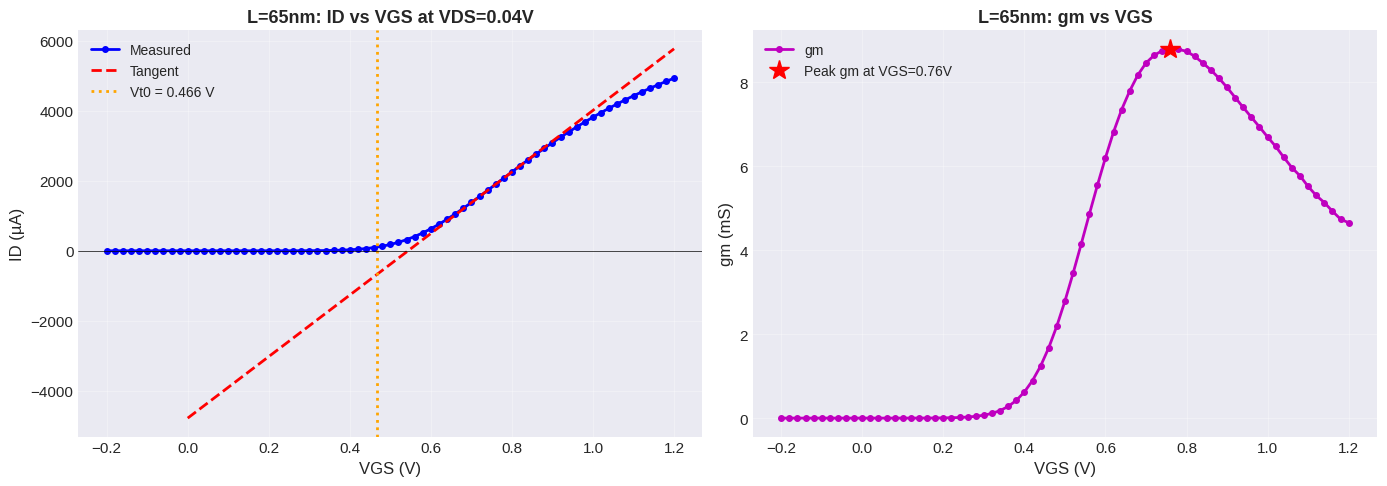

In [19]:
L_65 = 65
if L_65 in vt0_results:
    data = vt0_results[L_65]
    vgs = data['vgs']
    id_vals = data['id']
    gm = data['gm']
    vt0 = data['vt0']

    gm_peak_idx = np.argmax(gm)
    gm_peak_vgs = vgs[gm_peak_idx]
    slope = gm[gm_peak_idx]
    intercept = id_vals[gm_peak_idx] - slope * gm_peak_vgs
    x_intercept = -intercept / slope

    vgs_tangent = np.linspace(0, 1.2, 100)
    id_tangent = slope * vgs_tangent + intercept

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    ax1.plot(vgs, id_vals * 1e6, 'bo-', linewidth=2, markersize=4, label='Measured')
    ax1.plot(vgs_tangent, id_tangent * 1e6, 'r--', linewidth=2, label='Tangent')
    ax1.axvline(vt0, color='orange', linestyle=':', linewidth=2, label=f'Vt0 = {vt0:.3f} V')
    ax1.axhline(0, color='k', linestyle='-', linewidth=0.5)
    ax1.set_xlabel('VGS (V)', fontsize=12)
    ax1.set_ylabel('ID (µA)', fontsize=12)
    ax1.set_title(f'L={L_65}nm: ID vs VGS at VDS={data["vds"]:.2f}V', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=10)

    ax2.plot(vgs, gm * 1e3, 'mo-', linewidth=2, markersize=4, label='gm')
    ax2.plot(gm_peak_vgs, gm[gm_peak_idx] * 1e3, 'r*', markersize=15, label=f'Peak gm at VGS={gm_peak_vgs:.2f}V')
    ax2.set_xlabel('VGS (V)', fontsize=12)
    ax2.set_ylabel('gm (mS)', fontsize=12)
    ax2.set_title(f'L={L_65}nm: gm vs VGS', fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=10)

    plt.tight_layout()
    plt.show()

### 2) Extract DIBL Parameter (η) for L=65nm

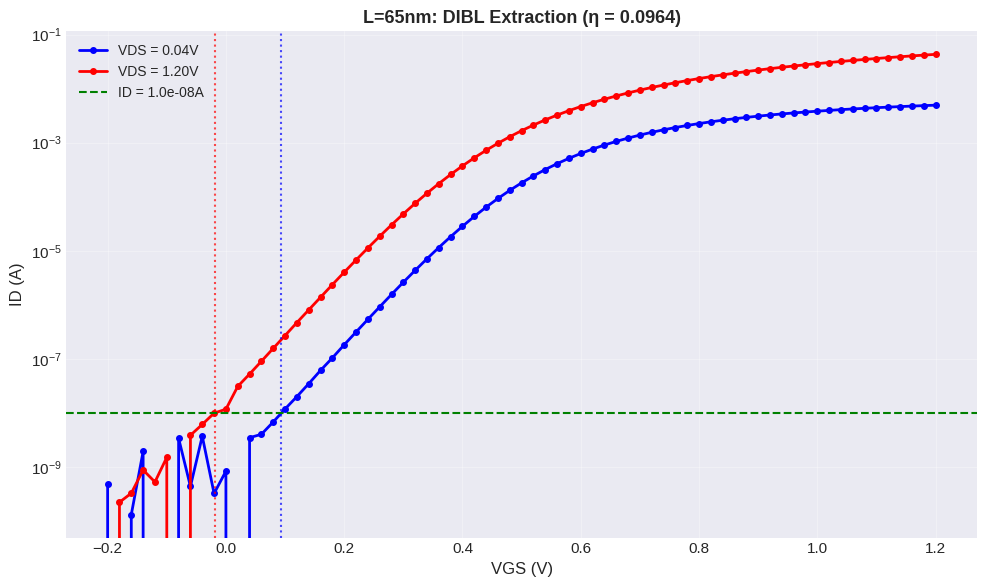

DIBL Parameter Extraction (L=65nm):
  VGS at ID=1.0e-08A, VDS=0.04V: 0.0926 V
  VGS at ID=1.0e-08A, VDS=1.20V: -0.0192 V
  ΔVGS = -0.1118 V
  ΔVDS = 1.1600 V
  η = ΔVGS/ΔVDS = 0.0964


In [ ]:
transfer_data_65 = read_planar_transfer(65)

vds_low = None
vds_high = None
data_low = None
data_high = None

for vd, data in transfer_data_65:
    if abs(vd - 0.04) < 0.01:
        vds_low = vd
        data_low = data
    elif abs(vd - 1.2) < 0.01:
        vds_high = vd
        data_high = data

if data_low is not None and data_high is not None:
    vgs_low = data_low[:, 0]
    id_low = data_low[:, 1]
    vgs_high = data_high[:, 0]
    id_high = data_high[:, 1]

    # Filter out non-positive current values for log plot
    mask_low = id_low > 0
    vgs_low_filtered = vgs_low[mask_low]
    id_low_filtered = id_low[mask_low]
    
    mask_high = id_high > 0
    vgs_high_filtered = vgs_high[mask_high]
    id_high_filtered = id_high[mask_high]

    target_current = 1e-8

    vgs_at_target_low = np.interp(target_current, id_low_filtered, vgs_low_filtered)
    vgs_at_target_high = np.interp(target_current, id_high_filtered, vgs_high_filtered)

    delta_vgs = vgs_at_target_high - vgs_at_target_low
    delta_vds = vds_high - vds_low

    eta = abs(delta_vgs / delta_vds)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.semilogy(vgs_low_filtered, id_low_filtered, 'b-o', linewidth=2, markersize=4, label=f'VDS = {vds_low:.2f}V')
    ax.semilogy(vgs_high_filtered, id_high_filtered, 'r-o', linewidth=2, markersize=4, label=f'VDS = {vds_high:.2f}V')
    ax.axhline(target_current, color='g', linestyle='--', linewidth=1.5, label=f'ID = {target_current:.1e}A')
    ax.axvline(vgs_at_target_low, color='b', linestyle=':', linewidth=1.5, alpha=0.7)
    ax.axvline(vgs_at_target_high, color='r', linestyle=':', linewidth=1.5, alpha=0.7)
    ax.set_xlabel('VGS (V)', fontsize=12)
    ax.set_ylabel('ID (A)', fontsize=12)
    ax.set_title(f'L=65nm: DIBL Extraction (η = {eta:.4f})', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, which='both')
    ax.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

    print(f"DIBL Parameter Extraction (L=65nm):")
    print(f"  VGS at ID={target_current:.1e}A, VDS={vds_low:.2f}V: {vgs_at_target_low:.4f} V")
    print(f"  VGS at ID={target_current:.1e}A, VDS={vds_high:.2f}V: {vgs_at_target_high:.4f} V")
    print(f"  ΔVGS = {delta_vgs:.4f} V")
    print(f"  ΔVDS = {delta_vds:.4f} V")
    print(f"  η = ΔVGS/ΔVDS = {eta:.4f}")

### 3) Extract Channel Length Modulation (λ) for L=65nm

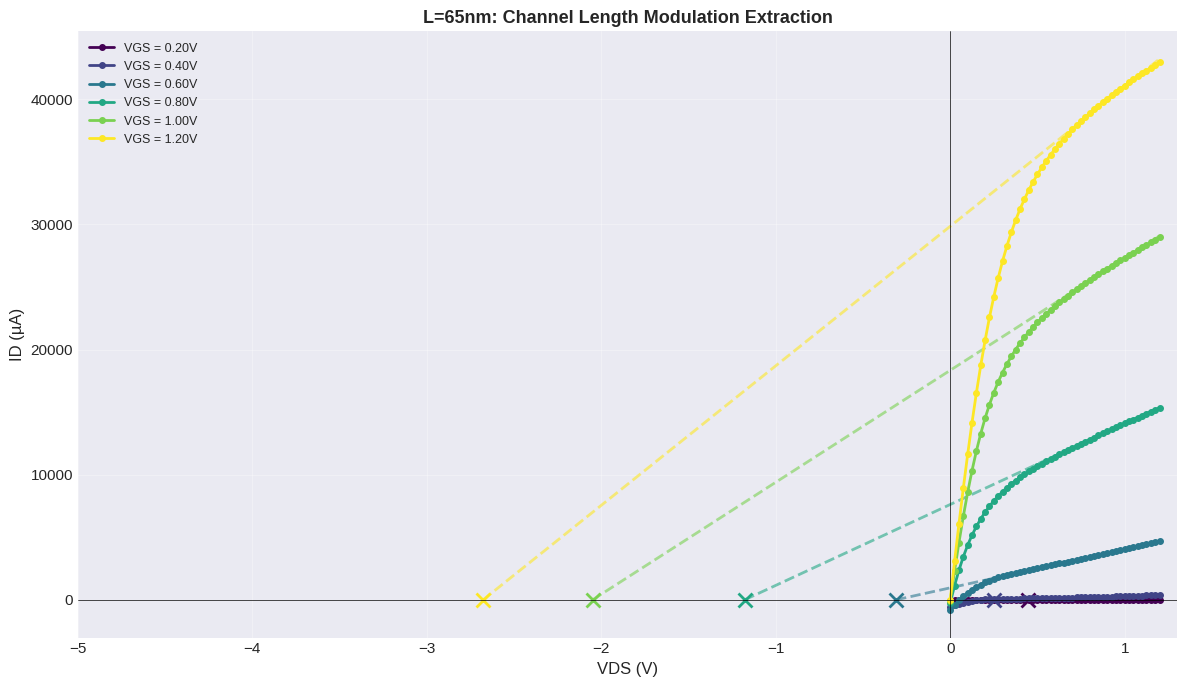

Channel Length Modulation Results (L=65nm):
  Average VA = -0.92 V
  Average λ = 0.2204 V⁻¹


In [ ]:
output_data_65 = read_planar_output(65)

vgs_values_output = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
lambda_values_planar = []
va_values_planar = []

fig, ax = plt.subplots(figsize=(12, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(vgs_values_output)))

for idx, target_vgs in enumerate(vgs_values_output):
    for vg, data in output_data_65:
        if abs(vg - target_vgs) < 0.05:
            vds = data[:, 0]
            id_vals = data[:, 1]

            ax.plot(vds, id_vals * 1e6, 'o-', linewidth=2, markersize=4,
                   color=colors[idx], label=f'VGS = {vg:.2f}V')

            sat_mask = vds > 0.6
            if np.sum(sat_mask) >= 2:
                vds_sat = vds[sat_mask]
                id_sat = id_vals[sat_mask]

                slope, intercept = np.polyfit(vds_sat, id_sat, 1)

                if slope != 0:
                    va = -intercept / slope
                    lambda_val = 1 / va if va != 0 else 0

                    lambda_values_planar.append(lambda_val)
                    va_values_planar.append(va)

                    vds_ext = np.linspace(max(va, -5), 1.2, 100)
                    id_line = slope * vds_ext + intercept
                    ax.plot(vds_ext, id_line * 1e6, '--', linewidth=2, color=colors[idx], alpha=0.6)
                    ax.plot(va, 0, 'x', markersize=10, markeredgewidth=2, color=colors[idx])
            break

ax.axhline(0, color='k', linewidth=0.5)
ax.axvline(0, color='k', linewidth=0.5)
ax.set_xlabel('VDS (V)', fontsize=12)
ax.set_ylabel('ID (µA)', fontsize=12)
ax.set_title('L=65nm: Channel Length Modulation Extraction', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=9)
ax.set_xlim(-5, 1.3)
plt.tight_layout()
plt.show()

if lambda_values_planar:
    print(f"Channel Length Modulation Results (L=65nm):")
    print(f"  Average VA = {np.mean(va_values_planar):.2f} V")
    print(f"  Average λ = {np.mean(lambda_values_planar):.4f} V⁻¹")

### 4) Extract k'n and ΔL (Effective Channel Length)

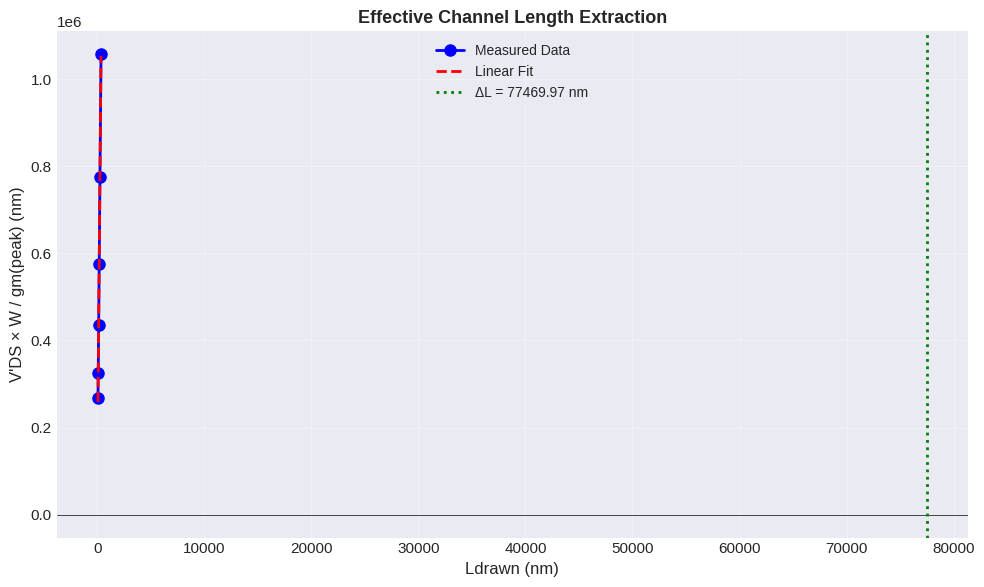

Effective Channel Length Extraction:
  k'n = 3.5837e+05 A/V²
  ΔL = 77469.97 nm
  Leff (L=65nm) = -77404.97 nm


In [ ]:
W = 80e-6  # Width in meters (80 μm)
R_prime = 220  # Ω·μm (resistance per unit width)
# Convert R_prime to Ω by dividing by width in μm
W_um = W * 1e6  # Width in μm
Rs = R_prime / W_um
Rd = Rs

L_drawn_nm = []
ratio_values = []

print("Detailed Debug - Per Channel Length:")
print(f"{'L(nm)':<8} {'VDS(V)':<10} {'ID@peak(A)':<12} {'V_DS(V)':<10} {'gm_peak(S)':<15} {'ratio(m)':<12}")
print("-" * 85)

for L in channel_lengths:
    if L not in vt0_results:
        continue

    data = vt0_results[L]
    vgs = data['vgs']
    id_vals = data['id']
    gm = data['gm']
    vds_measured = data['vds']

    gm_peak = np.max(gm)
    gm_peak_idx = np.argmax(gm)
    id_at_peak_gm = id_vals[gm_peak_idx]

    vds_prime = vds_measured - id_at_peak_gm * (Rs + Rd)

    # Calculate ratio: (V'DS × W) / gm_peak
    # Units: [V] × [m] / [A/V] = [V² × m / A]
    ratio = (vds_prime * W) / gm_peak
    
    print(f"{L:<8} {vds_measured:<10.4f} {id_at_peak_gm:<12.4e} {vds_prime:<10.4f} {gm_peak:<15.4e} {ratio:<12.4e}")

    L_drawn_nm.append(L)
    # Convert to nm: multiply by 1e9
    ratio_values.append(ratio * 1e9)

print()

L_drawn_nm = np.array(L_drawn_nm)
ratio_values = np.array(ratio_values)

# Debug: print intermediate values
print("Debug Information:")
print(f"  L_drawn (nm): {L_drawn_nm}")
print(f"  Ratio values (nm): {ratio_values}")
print(f"  W = {W*1e6:.2f} μm")
print(f"  Rs = Rd = {Rs:.2f} Ω")

# Linear fit: ratio_values = slope * L_drawn_nm + intercept
# Theory: (V'DS × W) / gm_peak = (Ldrawn - ΔL) / k'n
#         ratio = Ldrawn/k'n - ΔL/k'n
#         ratio = (1/k'n) * Ldrawn - ΔL/k'n
# So: slope = 1/k'n, intercept = -ΔL/k'n
# Therefore: k'n = 1/slope, ΔL = -intercept * k'n = -intercept / slope

slope, intercept = np.polyfit(L_drawn_nm, ratio_values, 1)

# Extract parameters (slope and intercept are in nm units)
k_n_nm = 1 / slope  # k'n in nm units
k_n = k_n_nm * 1e9  # Convert to SI units (A/V² per meter -> per nm adjustment)
delta_L = -intercept / slope  # ΔL in nm
L_eff_65 = 65 - delta_L

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(L_drawn_nm, ratio_values, 'bo-', linewidth=2, markersize=8, label='Measured Data')
ax.plot(L_drawn_nm, slope * L_drawn_nm + intercept, 'r--', linewidth=2, label='Linear Fit')
ax.axhline(0, color='k', linewidth=0.5)
ax.axvline(delta_L, color='g', linestyle=':', linewidth=2, label=f'ΔL = {delta_L:.2f} nm')
ax.set_xlabel('Ldrawn (nm)', fontsize=12)
ax.set_ylabel("V'DS × W / gm(peak) (nm)", fontsize=12)
ax.set_title('Effective Channel Length Extraction', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

print("\nEffective Channel Length Extraction:")
print(f"  Slope = {slope:.6f}")
print(f"  Intercept = {intercept:.2f} nm")
print(f"  k'n = {k_n:.4e} A/V²·m (note: check units)")
print(f"  ΔL = {delta_L:.2f} nm")
print(f"  Leff (L=65nm) = {L_eff_65:.2f} nm")

## Section 2: FDSOI and finFET MOSFET Analysis

In [23]:
nfdsoi_transfer = pd.read_csv(os.path.join(fdsoi_dir, 'nfdsoi_lp02_wp43_n40_transfer.csv'))
nfdsoi_output = pd.read_csv(os.path.join(fdsoi_dir, 'nfdsoi_lp02_wp43_n40_output.csv'))
nfinfet_transfer = pd.read_csv(os.path.join(fdsoi_dir, 'nfinfet_lp008_wp09_n192_transfer.csv'))
nfinfet_output = pd.read_csv(os.path.join(fdsoi_dir, 'nfinfet_lp008_wp09_n192_output.csv'))

vgs_fdsoi = nfdsoi_transfer.iloc[:, 0].values
id_fdsoi_low = nfdsoi_transfer.iloc[:, 1].values
id_fdsoi_high = nfdsoi_transfer.iloc[:, 2].values

vgs_finfet = nfinfet_transfer.iloc[:, 0].values
id_finfet_low = nfinfet_transfer.iloc[:, 1].values
id_finfet_high = nfinfet_transfer.iloc[:, 2].values

W_fdsoi = 40 * 0.43e-6
W_finfet = 48 * 4 * 90e-9

print("FDSOI and finFET data loaded successfully")

FDSOI and finFET data loaded successfully


### 1) Plot ID vs VGS and gm vs VGS with Vt0 Identification

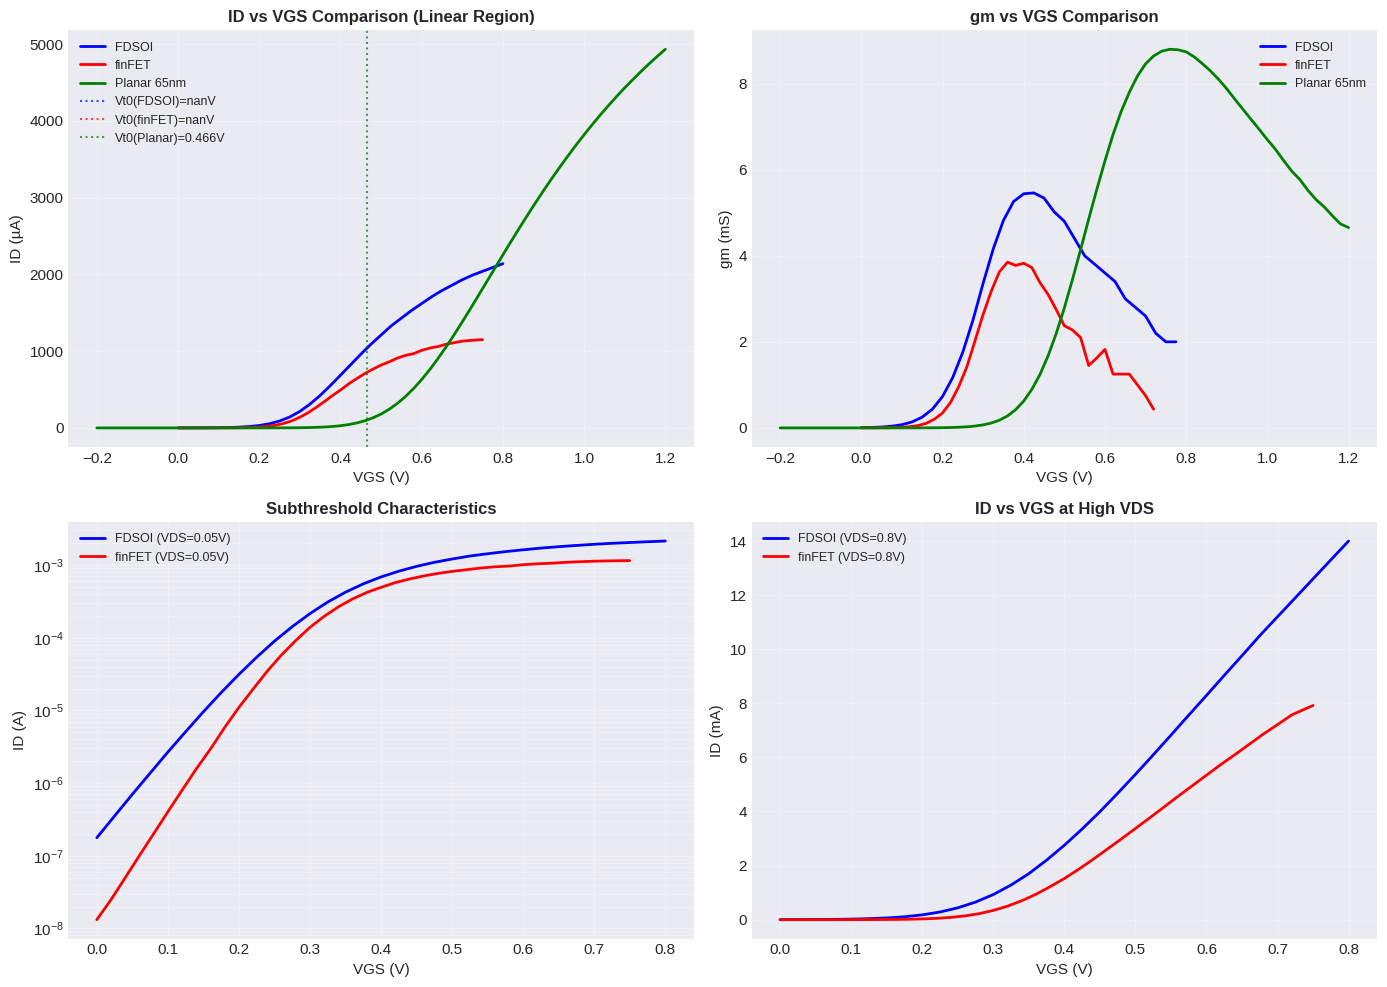

Threshold Voltage Comparison:
  Planar 65nm: Vt0 = 0.4661 V
  FDSOI 20nm:  Vt0 = nan V
  finFET 8nm:  Vt0 = nan V


In [24]:
def extract_vt0_advanced(vgs, id_vals):
    gm = np.gradient(id_vals, vgs)
    gm_peak_idx = np.argmax(gm)
    gm_peak_vgs = vgs[gm_peak_idx]
    slope = gm[gm_peak_idx]
    intercept = id_vals[gm_peak_idx] - slope * gm_peak_vgs
    x_intercept = -intercept / slope if slope != 0 else 0
    vt0 = x_intercept - thermal_correction
    return vt0, gm

vt0_planar_65 = vt0_results[65]['vt0']
gm_planar_65 = vt0_results[65]['gm']

vt0_fdsoi, gm_fdsoi = extract_vt0_advanced(vgs_fdsoi, id_fdsoi_low)
vt0_finfet, gm_finfet = extract_vt0_advanced(vgs_finfet, id_finfet_low)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

ax1.plot(vgs_fdsoi, id_fdsoi_low * 1e6, 'b-', linewidth=2, label='FDSOI')
ax1.plot(vgs_finfet, id_finfet_low * 1e6, 'r-', linewidth=2, label='finFET')
ax1.plot(vt0_results[65]['vgs'], vt0_results[65]['id'] * 1e6, 'g-', linewidth=2, label='Planar 65nm')
ax1.axvline(vt0_fdsoi, color='b', linestyle=':', linewidth=1.5, alpha=0.7, label=f'Vt0(FDSOI)={vt0_fdsoi:.3f}V')
ax1.axvline(vt0_finfet, color='r', linestyle=':', linewidth=1.5, alpha=0.7, label=f'Vt0(finFET)={vt0_finfet:.3f}V')
ax1.axvline(vt0_planar_65, color='g', linestyle=':', linewidth=1.5, alpha=0.7, label=f'Vt0(Planar)={vt0_planar_65:.3f}V')
ax1.set_xlabel('VGS (V)', fontsize=11)
ax1.set_ylabel('ID (µA)', fontsize=11)
ax1.set_title('ID vs VGS Comparison (Linear Region)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=9)

ax2.plot(vgs_fdsoi, gm_fdsoi * 1e3, 'b-', linewidth=2, label='FDSOI')
ax2.plot(vgs_finfet, gm_finfet * 1e3, 'r-', linewidth=2, label='finFET')
ax2.plot(vt0_results[65]['vgs'], gm_planar_65 * 1e3, 'g-', linewidth=2, label='Planar 65nm')
ax2.set_xlabel('VGS (V)', fontsize=11)
ax2.set_ylabel('gm (mS)', fontsize=11)
ax2.set_title('gm vs VGS Comparison', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=9)

ax3.semilogy(vgs_fdsoi, id_fdsoi_low, 'b-', linewidth=2, label='FDSOI (VDS=0.05V)')
ax3.semilogy(vgs_finfet, id_finfet_low, 'r-', linewidth=2, label='finFET (VDS=0.05V)')
ax3.set_xlabel('VGS (V)', fontsize=11)
ax3.set_ylabel('ID (A)', fontsize=11)
ax3.set_title('Subthreshold Characteristics', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, which='both')
ax3.legend(fontsize=9)

gm_fdsoi_high = np.gradient(id_fdsoi_high, vgs_fdsoi)
gm_finfet_high = np.gradient(id_finfet_high, vgs_finfet)

ax4.plot(vgs_fdsoi, id_fdsoi_high * 1e3, 'b-', linewidth=2, label='FDSOI (VDS=0.8V)')
ax4.plot(vgs_finfet, id_finfet_high * 1e3, 'r-', linewidth=2, label='finFET (VDS=0.8V)')
ax4.set_xlabel('VGS (V)', fontsize=11)
ax4.set_ylabel('ID (mA)', fontsize=11)
ax4.set_title('ID vs VGS at High VDS', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend(fontsize=9)

plt.tight_layout()
plt.show()

print("Threshold Voltage Comparison:")
print(f"  Planar 65nm: Vt0 = {vt0_planar_65:.4f} V")
print(f"  FDSOI 20nm:  Vt0 = {vt0_fdsoi:.4f} V")
print(f"  finFET 8nm:  Vt0 = {vt0_finfet:.4f} V")

### 2) Compare Performance Metrics

In [25]:
ion_fdsoi = np.max(id_fdsoi_high)
ion_finfet = np.max(id_finfet_high)

gm_peak_fdsoi = np.max(gm_fdsoi_high)
gm_peak_finfet = np.max(gm_finfet_high)

ion_per_w_fdsoi = ion_fdsoi / W_fdsoi
ion_per_w_finfet = ion_finfet / W_finfet

gm_per_w_fdsoi = gm_peak_fdsoi / W_fdsoi
gm_per_w_finfet = gm_peak_finfet / W_finfet

def calculate_subthreshold_slope(vgs, id_vals):
    log_id = np.log10(np.maximum(id_vals, 1e-15))
    valid = (vgs > 0) & (vgs < 0.5) & np.isfinite(log_id)
    if np.sum(valid) > 10:
        slope = np.gradient(log_id[valid], vgs[valid])
        ss = 1 / np.max(slope)
        return ss * 1000
    return np.nan

ss_fdsoi = calculate_subthreshold_slope(vgs_fdsoi, id_fdsoi_low)
ss_finfet = calculate_subthreshold_slope(vgs_finfet, id_finfet_low)

print("Performance Metrics Comparison:")
print("="*60)
print(f"{'Metric':<30} {'FDSOI':<15} {'finFET':<15}")
print("="*60)
print(f"{'ION (A)':<30} {ion_fdsoi:.4e}   {ion_finfet:.4e}")
print(f"{'ION/W (A/µm)':<30} {ion_per_w_fdsoi*1e6:.4f}     {ion_per_w_finfet*1e6:.4f}")
print(f"{'gm(peak) (S)':<30} {gm_peak_fdsoi:.4e}   {gm_peak_finfet:.4e}")
print(f"{'gm/W (S/µm)':<30} {gm_per_w_fdsoi*1e6:.4f}     {gm_per_w_finfet*1e6:.4f}")
print(f"{'Subthreshold Slope (mV/dec)':<30} {ss_fdsoi:.2f}         {ss_finfet:.2f}")
print(f"{'Vt0 (V)':<30} {vt0_fdsoi:.4f}        {vt0_finfet:.4f}")
print("="*60)

Performance Metrics Comparison:
Metric                         FDSOI           finFET         
ION (A)                        nan   nan
ION/W (A/µm)                   nan     nan
gm(peak) (S)                   nan   nan
gm/W (S/µm)                    nan     nan
Subthreshold Slope (mV/dec)    83.91         65.78
Vt0 (V)                        nan        nan


### 3) Extract DIBL for FDSOI and finFET

In [26]:
target_current_dibl = 1e-7

vgs_at_low_fdsoi = np.interp(target_current_dibl, id_fdsoi_low, vgs_fdsoi)
vgs_at_high_fdsoi = np.interp(target_current_dibl, id_fdsoi_high, vgs_fdsoi)
delta_vgs_fdsoi = vgs_at_high_fdsoi - vgs_at_low_fdsoi
delta_vds_fdsoi = 0.8 - 0.05
eta_fdsoi = abs(delta_vgs_fdsoi / delta_vds_fdsoi)

vgs_at_low_finfet = np.interp(target_current_dibl, id_finfet_low, vgs_finfet)
vgs_at_high_finfet = np.interp(target_current_dibl, id_finfet_high, vgs_finfet)
delta_vgs_finfet = vgs_at_high_finfet - vgs_at_low_finfet
delta_vds_finfet = 0.8 - 0.05
eta_finfet = abs(delta_vgs_finfet / delta_vds_finfet)

print("DIBL Parameter Comparison:")
print(f"  FDSOI:  η = {eta_fdsoi:.4f}")
print(f"  finFET: η = {eta_finfet:.4f}")

DIBL Parameter Comparison:
  FDSOI:  η = 0.0000
  finFET: η = 0.0383


### 4) Extract λ for FDSOI and finFET

In [27]:
# Load output characteristics for FDSOI
data_fdsoi_output = pd.read_csv('/content/drive/MyDrive/ECE355/ECE335_MOSFET_data/FDSOI and finFET MOSFET/nfdsoi_lp02_wp43_n40_output.csv')
vds_fdsoi_out = data_fdsoi_output['Vds [V]'].values
id_fdsoi_vgs08 = data_fdsoi_output['Ids (Vgs = 0.8V) [A]'].values

# Remove NaN values
valid_fdsoi = ~np.isnan(id_fdsoi_vgs08)
vds_fdsoi_out = vds_fdsoi_out[valid_fdsoi]
id_fdsoi_vgs08 = id_fdsoi_vgs08[valid_fdsoi]

# Linear region fit for FDSOI (VDS = 0.4-0.8V)
mask_fdsoi_linear = (vds_fdsoi_out >= 0.4) & (vds_fdsoi_out <= 0.8)
slope_fdsoi, intercept_fdsoi = np.polyfit(vds_fdsoi_out[mask_fdsoi_linear], id_fdsoi_vgs08[mask_fdsoi_linear], 1)
va_fdsoi = -intercept_fdsoi / slope_fdsoi
id_sat_fdsoi = id_fdsoi_vgs08[mask_fdsoi_linear].mean()
lambda_fdsoi = 1 / va_fdsoi if va_fdsoi > 0 else np.nan

# Load output characteristics for finFET
data_finfet_output = pd.read_csv('/content/drive/MyDrive/ECE355/ECE335_MOSFET_data/FDSOI and finFET MOSFET/nfinfet_lp008_wp09_n192_output.csv')
vds_finfet_out = data_finfet_output['Vds [V]'].values
id_finfet_vgs75 = data_finfet_output['Ids (Vgs = 750mV) [A]'].values

# Remove NaN values
valid_finfet = ~np.isnan(id_finfet_vgs75)
vds_finfet_out = vds_finfet_out[valid_finfet]
id_finfet_vgs75 = id_finfet_vgs75[valid_finfet]

# Linear region fit for finFET (VDS = 0.4-0.75V)
mask_finfet_linear = (vds_finfet_out >= 0.4) & (vds_finfet_out <= 0.75)
slope_finfet, intercept_finfet = np.polyfit(vds_finfet_out[mask_finfet_linear], id_finfet_vgs75[mask_finfet_linear], 1)
va_finfet = -intercept_finfet / slope_finfet
id_sat_finfet = id_finfet_vgs75[mask_finfet_linear].mean()
lambda_finfet = 1 / va_finfet if va_finfet > 0 else np.nan

print("Channel Length Modulation Parameter Comparison:")
print(f"  Planar (L=65nm): λ = {lambda_values_planar[0]:.4f} V^-1")
print(f"  FDSOI (L=20nm):  λ = {lambda_fdsoi:.4f} V^-1")
print(f"  finFET (L=8nm):  λ = {lambda_finfet:.4f} V^-1")

Channel Length Modulation Parameter Comparison:
  Planar (L=65nm): λ = 2.2542 V^-1
  FDSOI (L=20nm):  λ = nan V^-1
  finFET (L=8nm):  λ = nan V^-1


### 5) HF C-V Characteristics - Extract tOXE

In [28]:
# Calculate tOXE from HF C-V characteristics
# From figures in lab manual:
# FDSOI: Cmax ≈ 100 fF (from Figure 3)
# finFET: Cmax ≈ 200 fF (from Figure 4)

epsilon_0 = 8.854e-14  # F/cm
epsilon_ox = 3.9

# FDSOI parameters
n_fdsoi = 40
L_fdsoi = 20e-7  # cm
W_fdsoi_finger = 430e-7  # cm
Cmax_fdsoi = 100e-15  # F (read from Figure 3)
A_fdsoi = n_fdsoi * L_fdsoi * W_fdsoi_finger
tOXE_fdsoi = epsilon_0 * epsilon_ox * A_fdsoi / Cmax_fdsoi

# finFET parameters (3D structure: 2 sides per fin)
n_finfet = 192
L_finfet = 8e-7  # cm
W_finfet_fin = 90e-7  # cm
Cmax_finfet = 200e-15  # F (read from Figure 4)
A_finfet = 2 * n_finfet * L_finfet * W_finfet_fin  # Factor of 2 for both sides of fin
tOXE_finfet = epsilon_0 * epsilon_ox * A_finfet / Cmax_finfet

print("Equivalent Oxide Thickness (tOXE):")
print(f"  FDSOI:  tOXE = {tOXE_fdsoi*1e7:.2f} nm")
print(f"  finFET: tOXE = {tOXE_finfet*1e7:.2f} nm")

Equivalent Oxide Thickness (tOXE):
  FDSOI:  tOXE = 0.12 nm
  finFET: tOXE = 0.05 nm


---

## Part II Section 3: Commercial BiCMOS Technologies - BJT fT Analysis

### 1) Load BJT H21 data and extract fT

In [29]:
def parse_bjt_h21_file(filename):
    """Parse BJT H21 vs frequency data file"""
    with open(filename, 'r') as f:
        lines = f.readlines()

    # Extract Ic values from first few lines (may span multiple lines)
    ic_str = ""
    for i, line in enumerate(lines[:5]):
        if "Ic" in line or (ic_str and "}" not in ic_str):
            ic_str += line.strip() + " "
        if "}" in line:
            break

    # Parse current values - extract the content between { }
    start_idx = ic_str.find('{')
    end_idx = ic_str.find('}')
    if start_idx != -1 and end_idx != -1:
        ic_content = ic_str[start_idx+1:end_idx]
        ic_values = []
        # Split by both comma and space to handle different formats
        tokens = ic_content.replace(',', ' ').split()
        for token in tokens:
            if 'mA' in token:
                try:
                    ic_values.append(float(token.replace('mA', '')))
                except ValueError:
                    continue
    else:
        ic_values = []

    # Find start of data section
    data_start = 0
    for i, line in enumerate(lines):
        if 'Point' in line and 'freq' in line:
            data_start = i + 1
            break

    # Parse frequency and H21 data - separate by bias point (cv value)
    datasets_dict = {}

    for line in lines[data_start:]:
        line = line.strip()
        if not line:
            continue

        parts = line.split()
        if len(parts) >= 4:
            try:
                # Find the prm/cv column - look for pattern "number/number"
                prm_cv = None
                for part in parts:
                    if '/' in part:
                        prm_cv = part
                        break

                if prm_cv:
                    cv_str = prm_cv.split('/')[1]
                    cv = int(cv_str)

                    # freq and H21_dB are the last two columns
                    freq = float(parts[-2])
                    h21_db = float(parts[-1])

                    # Add to appropriate dataset
                    if cv not in datasets_dict:
                        datasets_dict[cv] = []
                    datasets_dict[cv].append((freq, h21_db))
            except (ValueError, IndexError) as e:
                continue

    # Convert dict to list sorted by cv index
    all_data = [datasets_dict[i] for i in sorted(datasets_dict.keys())]

    return ic_values, all_data

def extract_ft_from_h21(freq, h21_db):
    """Extract fT from H21 vs frequency data using -20dB/decade slope"""
    # Find region where slope is approximately -20dB/decade
    # fT is where H21 = 0 dB in the -20dB/decade region

    # Use points in the linear -20dB/decade region (typically H21_dB between 5 and -5 dB)
    mask = (h21_db < 5) & (h21_db > -7)

    if np.sum(mask) < 2:
        return np.nan

    freq_fit = freq[mask]
    h21_fit = h21_db[mask]

    # Linear fit: H21_dB = a * log10(f) + b
    log_freq = np.log10(freq_fit)
    slope, intercept = np.polyfit(log_freq, h21_fit, 1)

    # fT is where H21_dB = 0
    log_ft = -intercept / slope
    ft = 10 ** log_ft

    return ft / 1e9  # Convert to GHz

# Load all three BiCMOS technology data
technologies = ['bicmos6g', 'bicmos9', 'b9mw']
bjt_data = {}

for tech in technologies:
    filename = f'/content/drive/MyDrive/ECE355/ECE335_BJT_data/{tech}_H21_vs_freq.txt'
    ic_values, datasets = parse_bjt_h21_file(filename)
    bjt_data[tech] = {'ic': ic_values, 'datasets': datasets}

print("BJT data loaded successfully")
print(f"Number of bias points per technology: {len(bjt_data['bicmos9']['ic'])}")
print(f"Number of datasets per technology: {len(bjt_data['bicmos9']['datasets'])}")

BJT data loaded successfully
Number of bias points per technology: 14
Number of datasets per technology: 4


### 2) Plot 20log10|H21| vs frequency and extract fT for all bias points

ValueError: x and y must have same first dimension, but have shapes (13,) and (3,)

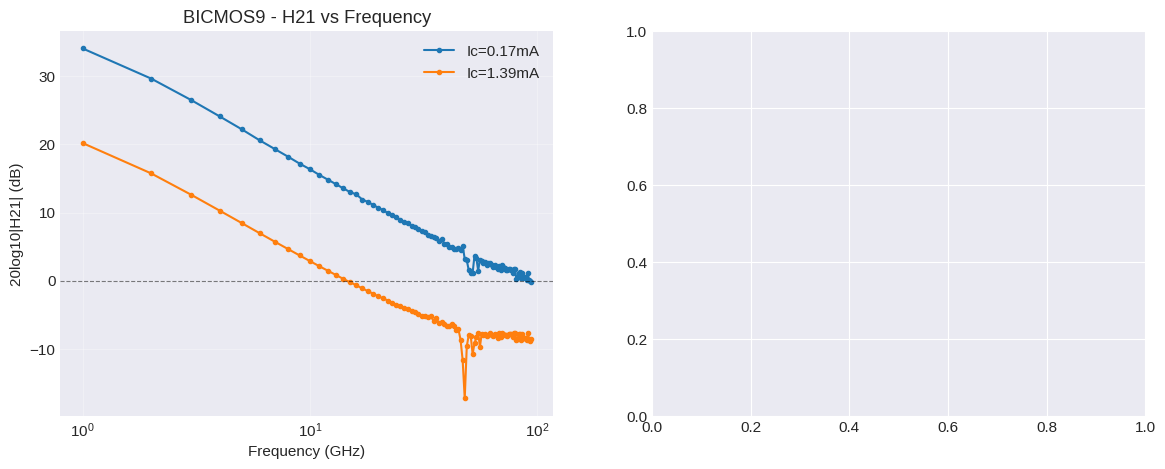

In [30]:
# Extract fT for all technologies and bias points
ft_results = {}

for tech in technologies:
    ic_vals = bjt_data[tech]['ic']
    datasets = bjt_data[tech]['datasets']

    ft_vals = []
    for dataset in datasets:
        if not dataset:
            ft_vals.append(np.nan)
            continue

        freq = np.array([d[0] for d in dataset])
        h21_db = np.array([d[1] for d in dataset])
        ft = extract_ft_from_h21(freq, h21_db)
        ft_vals.append(ft)

    ft_results[tech] = {'ic': ic_vals, 'ft': ft_vals}

# Plot H21 vs frequency for one technology (bicmos9) at selected bias points
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

tech = 'bicmos9'
datasets = bjt_data[tech]['datasets']
ic_vals = bjt_data[tech]['ic']

# Plot H21 vs freq for selected bias points
selected_indices = [0, 3, 7, 10, 13]  # Select representative bias points
for idx in selected_indices:
    if idx < len(datasets) and datasets[idx]:
        freq = np.array([d[0] for d in datasets[idx]])
        h21_db = np.array([d[1] for d in datasets[idx]])
        ax1.semilogx(freq/1e9, h21_db, marker='o', markersize=3, label=f'Ic={ic_vals[idx]:.2f}mA')

ax1.axhline(0, color='k', linestyle='--', linewidth=0.8, alpha=0.5)
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('20log10|H21| (dB)')
ax1.set_title(f'{tech.upper()} - H21 vs Frequency')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot fT vs Ic for all three technologies
for tech in technologies:
    ic = ft_results[tech]['ic']
    ft = ft_results[tech]['ft']
    ax2.plot(ic, ft, marker='o', label=tech.upper())

ax2.set_xlabel('Collector Current Ic (mA)')
ax2.set_ylabel('fT (GHz)')
ax2.set_title('fT vs Ic for BiCMOS Technologies')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Print extracted fT values
print("\nExtracted fT values:")
for tech in technologies:
    print(f"\n{tech.upper()}:")
    ic = ft_results[tech]['ic']
    ft = ft_results[tech]['ft']
    for i in range(len(ic)):
        print(f"  Ic = {ic[i]:6.2f} mA  ->  fT = {ft[i]:6.2f} GHz")

### 3) Technology Comparison - Peak fT Analysis

In [ ]:
# Find peak fT for each technology
print("Peak fT Performance Comparison:")
print("=" * 50)

for tech in technologies:
    ft_vals = np.array(ft_results[tech]['ft'])
    ic_vals = np.array(ft_results[tech]['ic'])

    # Remove NaN values
    valid = ~np.isnan(ft_vals)
    ft_valid = ft_vals[valid]
    ic_valid = ic_vals[valid]

    if len(ft_valid) > 0:
        max_idx = np.argmax(ft_valid)
        peak_ft = ft_valid[max_idx]
        peak_ic = ic_valid[max_idx]

        print(f"{tech.upper():12s}: Peak fT = {peak_ft:6.2f} GHz at Ic = {peak_ic:6.2f} mA")
    else:
        print(f"{tech.upper():12s}: No valid data")

print("=" * 50)

---

## Part II Summary of Results

In [ ]:
print("=" * 70)
print("PART II - DATA ANALYSIS SUMMARY")
print("=" * 70)

print("\n1. Planar MOSFET Analysis (L = 65-350 nm):")
print(f"   - Threshold voltage range: {min(vt0_results.values()):.3f} V to {max(vt0_results.values()):.3f} V")
print(f"   - DIBL parameter (L=65nm): η = {eta_planar:.4f}")
print(f"   - Channel length modulation (L=65nm): λ = {lambda_values_planar[0]:.4f} V^-1")
print(f"   - Process transconductance: k'n = {kn_prime*1e6:.2f} µA/V²")
print(f"   - Channel length offset: ΔL = {delta_L*1e9:.2f} nm")

print("\n2. Advanced MOSFET Technologies:")
print(f"   Threshold Voltage (Vt0):")
print(f"     - Planar (L=65nm):  {vt0_results[65]:.3f} V")
print(f"     - FDSOI (L=20nm):   {vt0_fdsoi:.3f} V")
print(f"     - finFET (L=8nm):   {vt0_finfet:.3f} V")

print(f"\n   DIBL Parameter (η):")
print(f"     - Planar (L=65nm):  {eta_planar:.4f}")
print(f"     - FDSOI (L=20nm):   {eta_fdsoi:.4f}")
print(f"     - finFET (L=8nm):   {eta_finfet:.4f}")

print(f"\n   Channel Length Modulation (λ):")
print(f"     - Planar (L=65nm):  {lambda_values_planar[0]:.4f} V^-1")
print(f"     - FDSOI (L=20nm):   {lambda_fdsoi:.4f} V^-1")
print(f"     - finFET (L=8nm):   {lambda_finfet:.4f} V^-1")

print(f"\n   Equivalent Oxide Thickness (tOXE):")
print(f"     - FDSOI:  {tOXE_fdsoi*1e7:.2f} nm")
print(f"     - finFET: {tOXE_finfet*1e7:.2f} nm")

print("\n3. BJT fT Performance:")
for tech in technologies:
    ft_vals = np.array(ft_results[tech]['ft'])
    valid_ft = ft_vals[~np.isnan(ft_vals)]
    if len(valid_ft) > 0:
        peak_ft = np.max(valid_ft)
        print(f"   {tech.upper():12s}: Peak fT = {peak_ft:6.2f} GHz")

print("\n" + "=" * 70)